# Here I will try to apply the same distortion analysis on the FDT data

In [1]:
import numpy as np
import pyfits
import matplotlib.pyplot as plt
import skimage
from skimage.feature import blob_dog, blob_doh, blob_log, canny
from skimage.color import rgb2gray
from skimage.feature import corner_harris, corner_subpix, corner_peaks
from skimage.segmentation import slic
from skimage.filters import sobel
from scipy.signal import convolve2d
from scipy import ndimage
from scipy.ndimage import gaussian_filter
from skimage import measure
from scipy.optimize import curve_fit
import matplotlib.ticker as mtick

In [2]:
path = '/home/fatima/Desktop/solar_orbiter_project/codes/targets/FDT/'

In [3]:
data = pyfits.getdata(path+'solo_L0_0000015267_20170411T170832.fits')

In [4]:
data.shape

(4, 2048, 2048)

In [5]:
I = data[0,:,:]
Q = data[1,:,:]
U = data[2,:,:]
V = data[3,:,:]

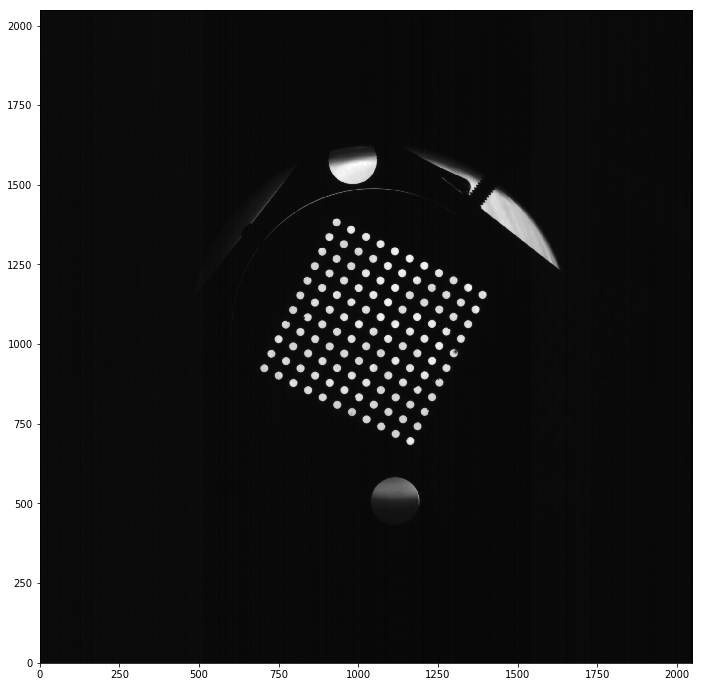

In [6]:
plt.figure(figsize=(18,12))

plt.imshow(Q,cmap='gray', origin='lower')

In [56]:
def rotateImage(img, angle, pivot):
    padX = [img.shape[1] - pivot[0], pivot[0]]
    padY = [img.shape[0] - pivot[1], pivot[1]]
    imgP = np.pad(img, [padY, padX], 'constant')
    imgR = ndimage.rotate(imgP, angle, reshape=False)
    return imgR[padY[0] : -padY[1], padX[0] : -padX[1]]


In [61]:
new_I = rotateImage(I,-30,[1023,1023])

In [151]:
new_I = ndimage.rotate(I, -26, reshape=False)

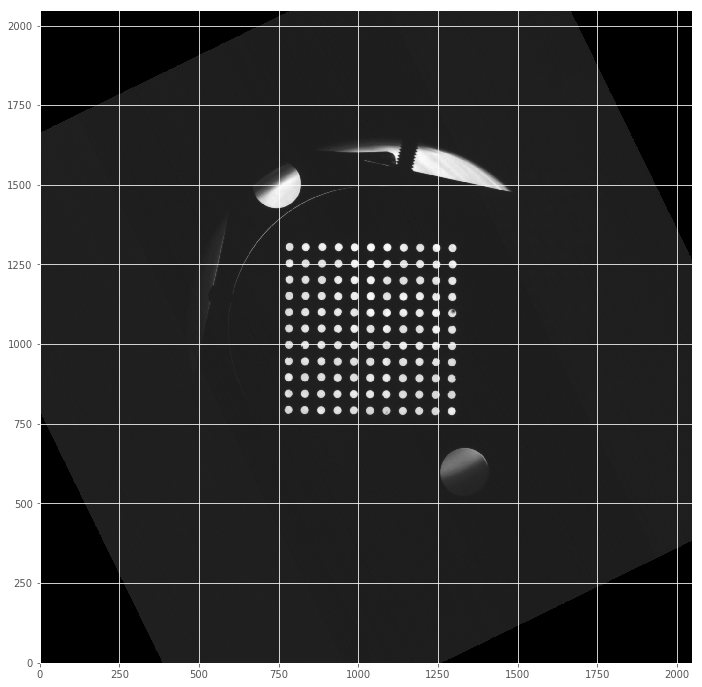

In [152]:
plt.figure(figsize=(18,12))

plt.imshow(new_I,cmap='gray', origin='lower')

In [153]:
I = new_I

# Rotating the FOV

In [6]:
I = I/I.mean()

In [272]:
#hdu = pyfits.PrimaryHDU(I)
#hdu.writeto(path+'Stokes_I_norm.fits')

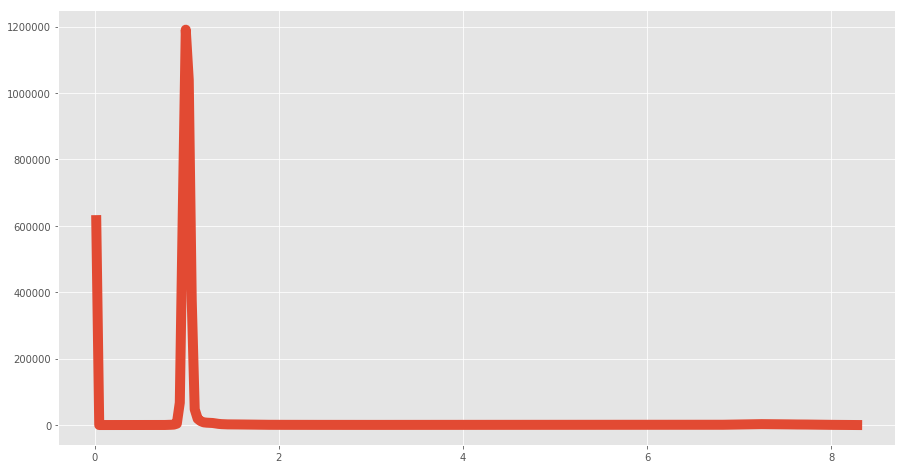

In [273]:
from skimage.exposure import histogram
hist, hist_centers = histogram(I)
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(hist_centers, hist, lw=10)

In [34]:
!pip install pip --upgrade --user

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
  Using cached https://files.pythonhosted.org/packages/4a/08/6ca123073af4ebc4c5488a5bc8a010ac57aa39ce4d3c8a931ad504de4185/pip-19.3-py2.py3-none-any.whl


In [36]:
import sys
!{sys.executable} -m pip install seaborn --user

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
Processing /home/fatima/.cache/pip/wheels/fc/1c/74/c8f80a532c06a789599b8659b117ec7d7574cac4a06f7dabfe/seaborn-0.9.0-cp27-none-any.whl


In [26]:
# sys
#import numpy
#numpy.__path__
#!type python
#sys.executable
#!pip --version

python is /usr/bin/python
pip 19.2.2 from /usr/local/lib/python2.7/dist-packages/pip (python 2.7)


# Masking

In [7]:
mask = np.zeros(I.shape)
mask[I<5] = 0
mask[I>5] = 1
#5

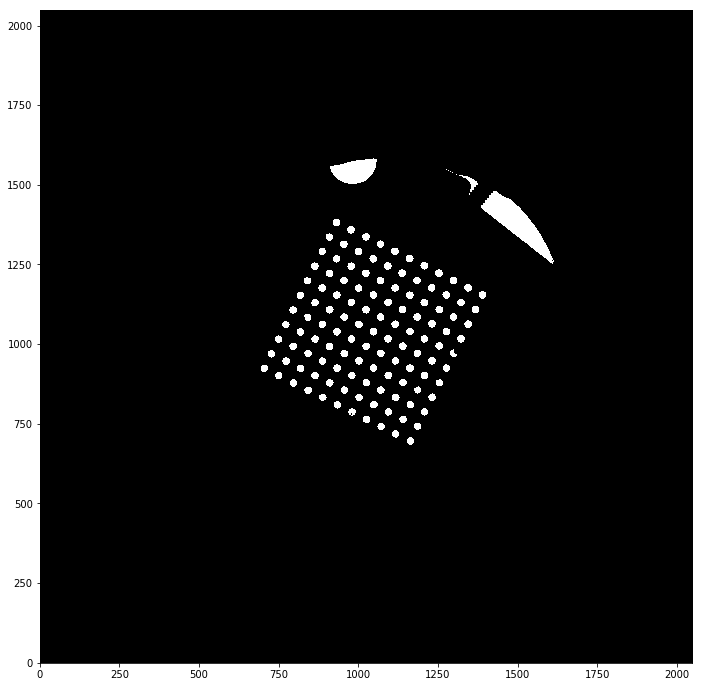

In [8]:
plt.figure(figsize=(18,12))

plt.imshow(mask,cmap='gray', origin='lower')

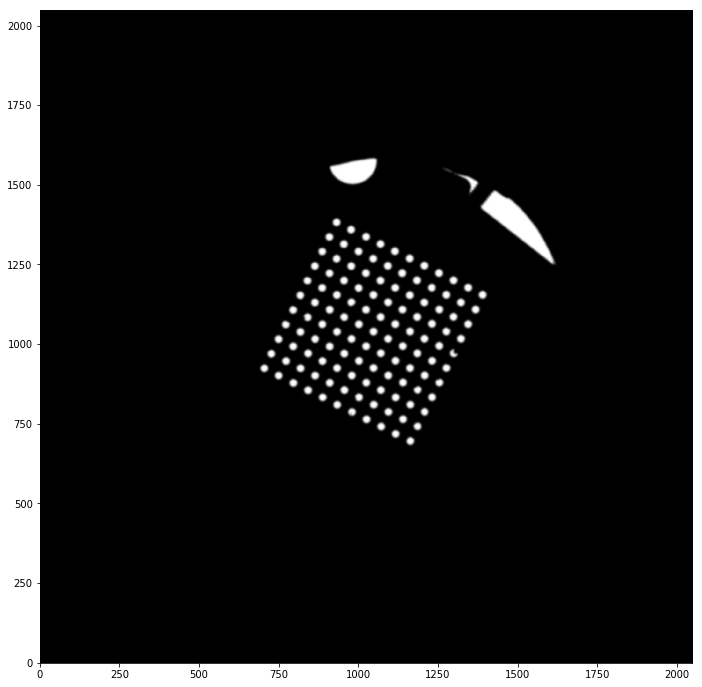

In [9]:
from scipy.ndimage.filters import gaussian_filter as gf
mask_smooth = gf(mask,sigma=3,mode='nearest')
fig = plt.figure(figsize=(18,12))
plt.imshow(mask_smooth,cmap='gray',origin='lower')

In [10]:
mask_2 = np.zeros((2048,2048))
mask_2[mask>0.6] = 1
mask_2[mask<0.6] = 0
             

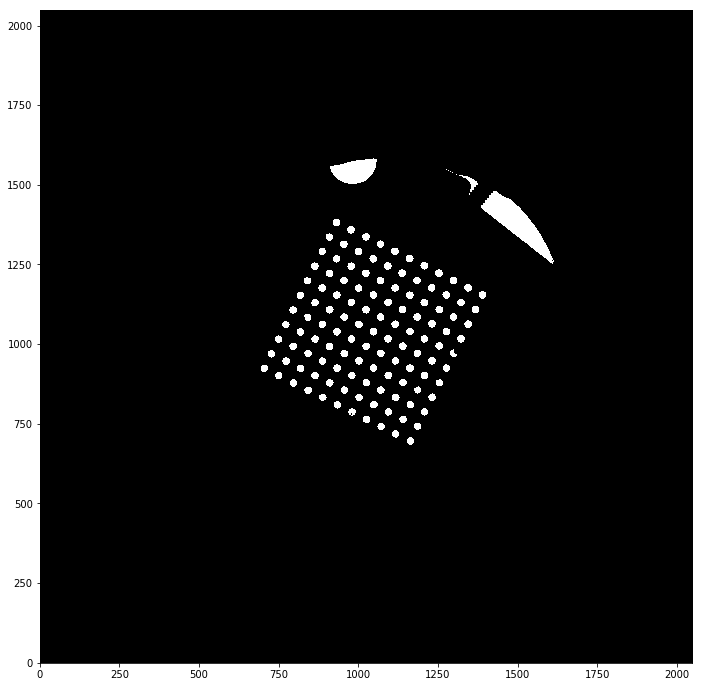

In [11]:
fig = plt.figure(figsize=(18,12))
plt.imshow(mask,cmap='gray',origin='lower')


# Labelling

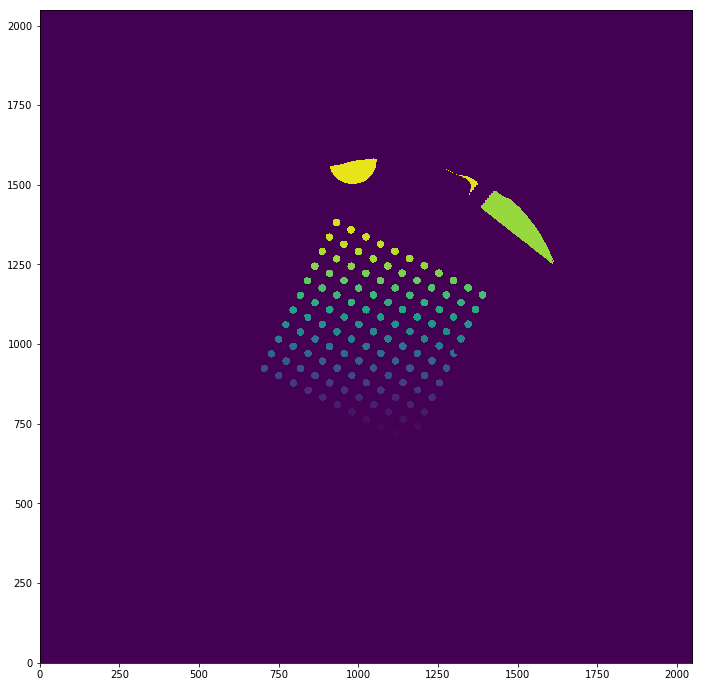

In [12]:
from skimage import measure
from skimage.measure import label
from skimage.measure import regionprops

labels, numb = measure.label(mask_2,background=0, return_num=True)
fig = plt.figure(figsize=(18,12))

plt.imshow(labels, origin='lower')


In [13]:
props = skimage.measure.regionprops(labels)
centers = np.array([prop.centroid for prop in props])


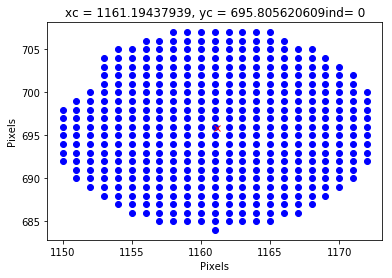

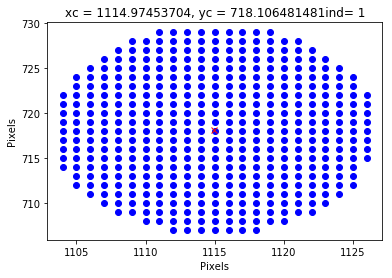

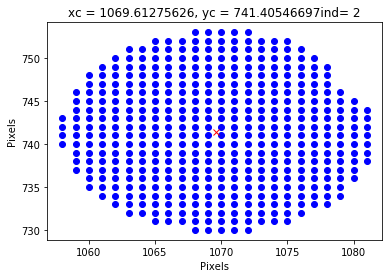

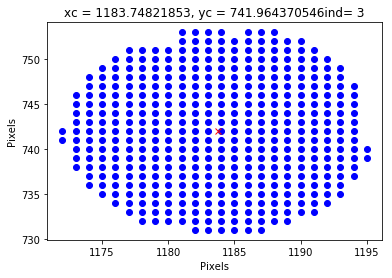

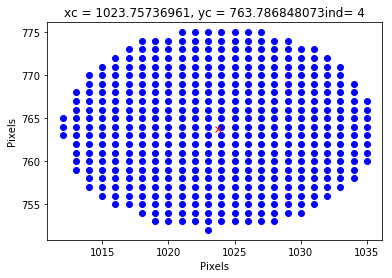

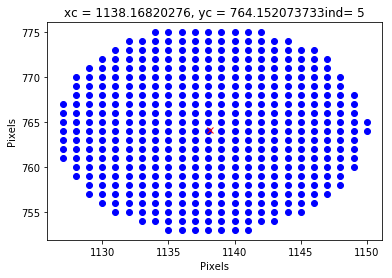

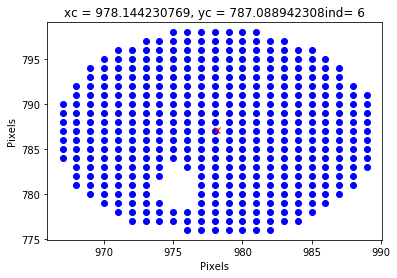

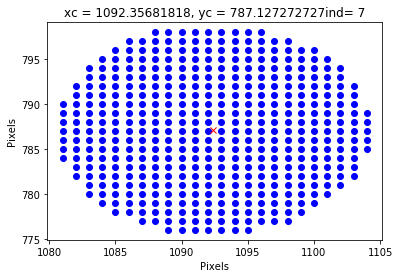

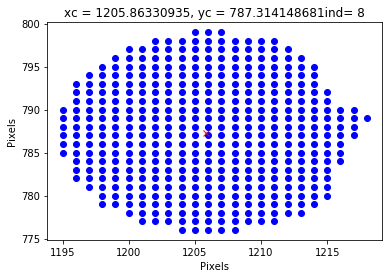

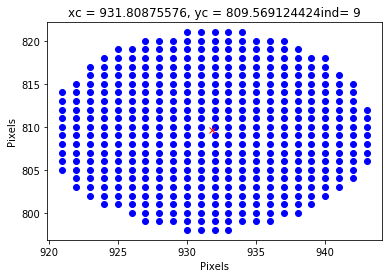

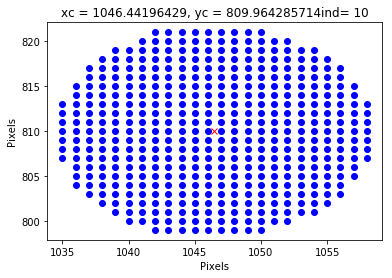

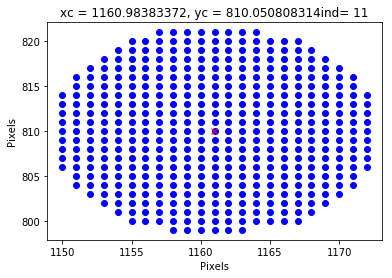

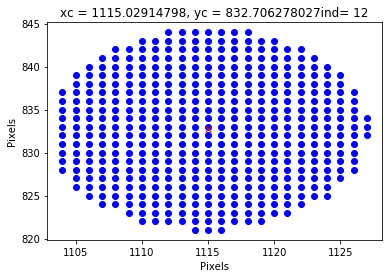

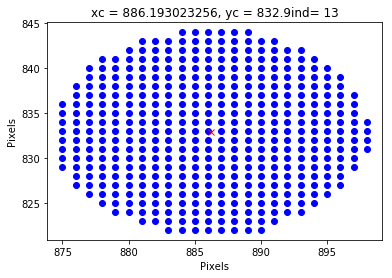

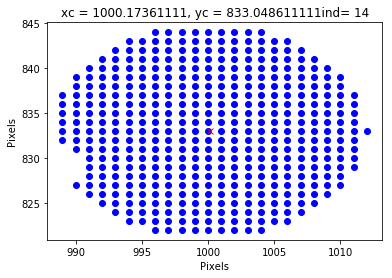

KeyboardInterrupt: 

In [19]:
for i in np.arange(numb):
    y, x = props[i].coords[:,0], props[i].coords[:,1]
    yc, xc = props[i].centroid
    plt.plot(x,y,'bo')
    plt.plot(xc,yc,'rx')
    #plt.title('Feature# '+str(label),fontsize=22)
    plt.xlabel('Pixels')
    plt.ylabel('Pixels')
    plt.title('xc = '+str(xc)+', yc = '+str(yc)+'ind= '+str(i))
    plt.show()
#plt.show()

In [14]:
Ind = [109,122,123,124,125,126,127,128,129]
#Ind = [1,122,123,124,125] for I_rot
props = np.delete(props,[Ind])
print [Ind]

[[109, 122, 123, 124, 125, 126, 127, 128, 129]]


In [15]:
centers = np.array([prop.centroid for prop in props])

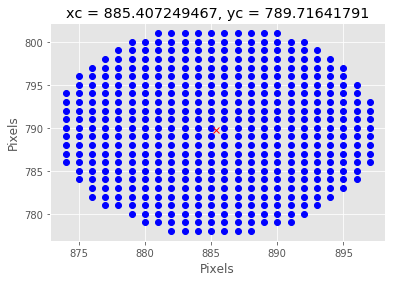

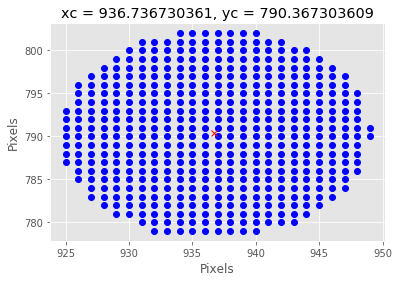

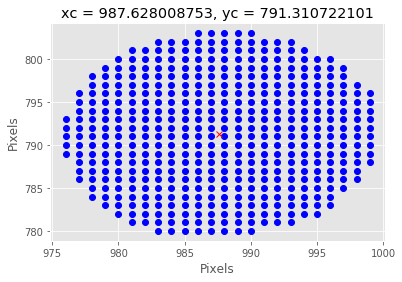

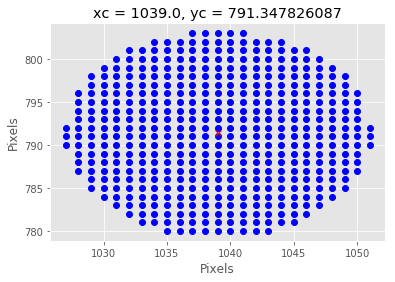

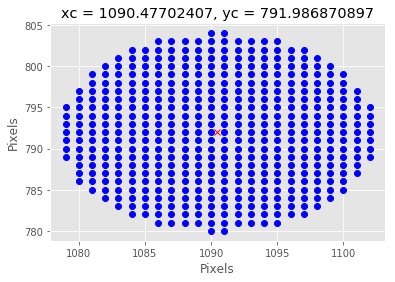

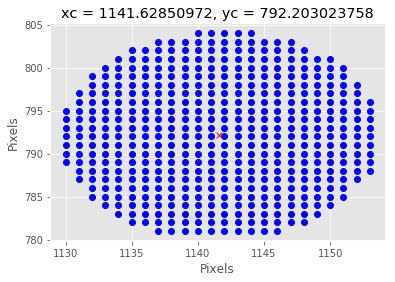

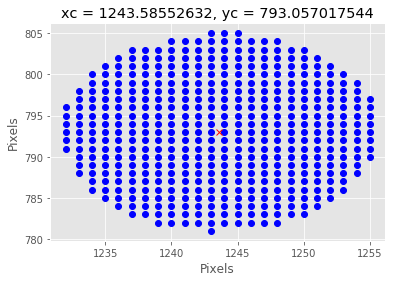

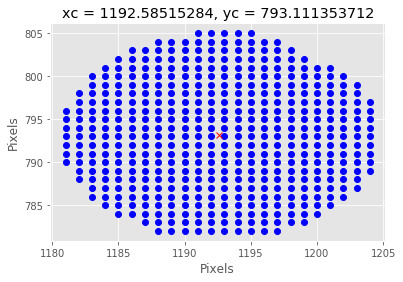

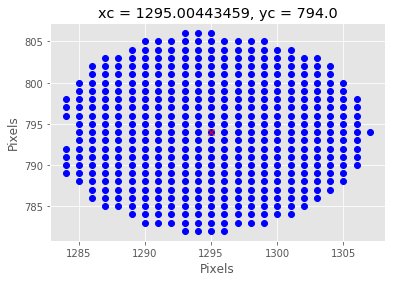

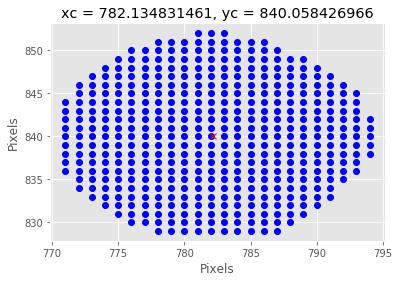

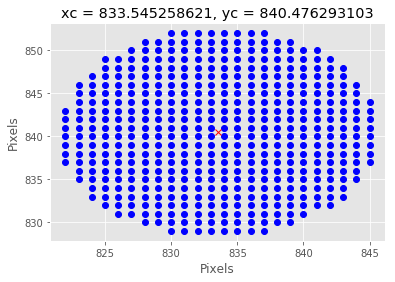

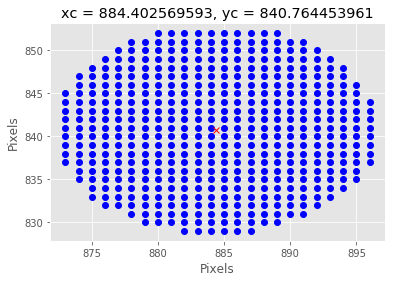

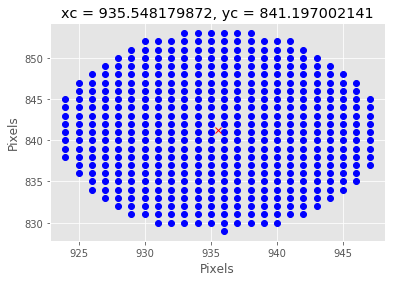

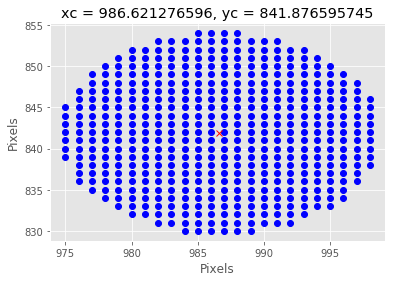

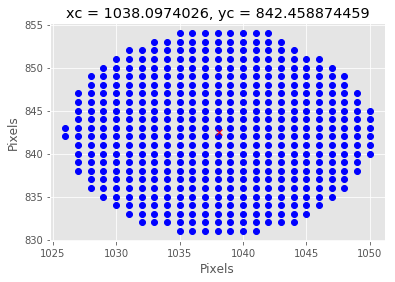

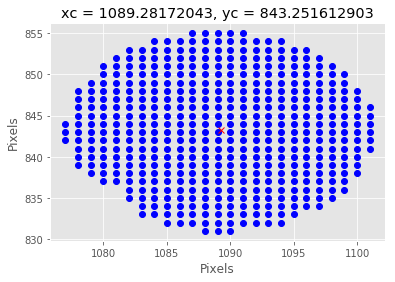

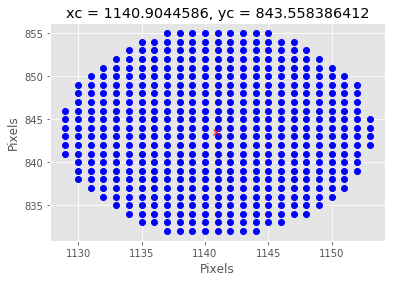

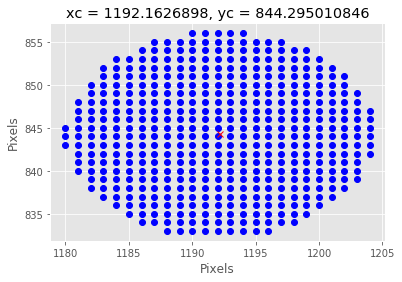

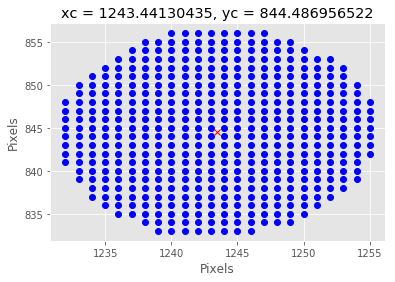

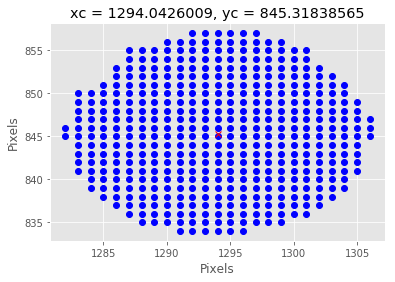

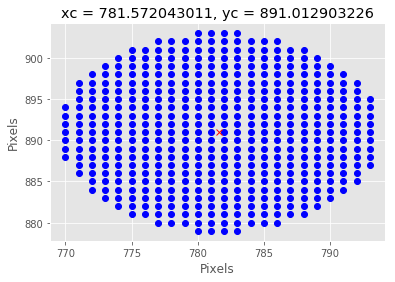

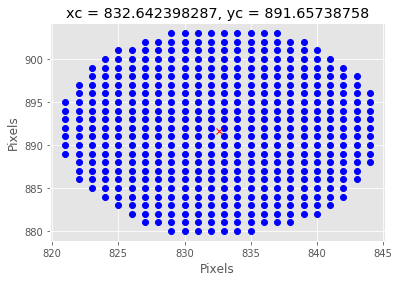

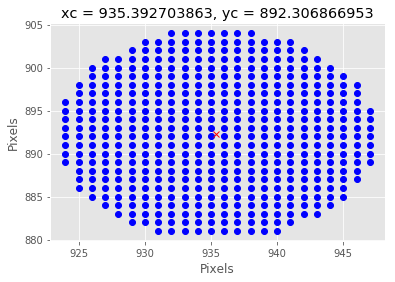

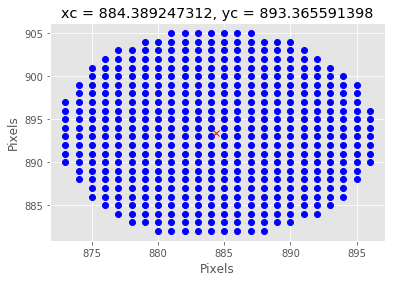

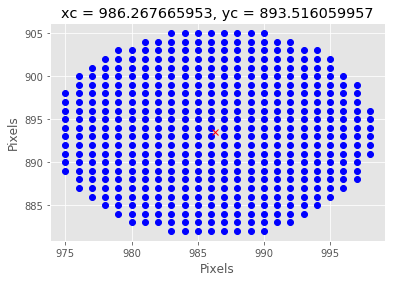

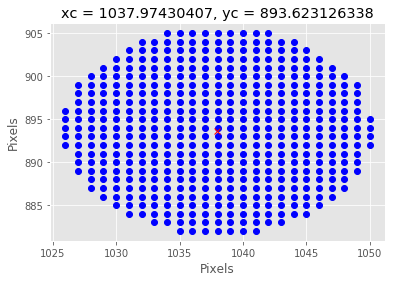

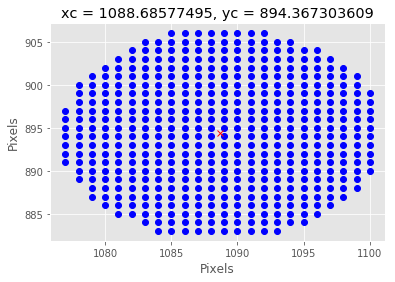

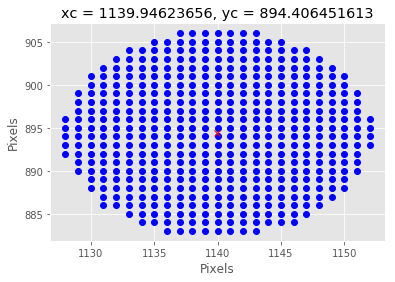

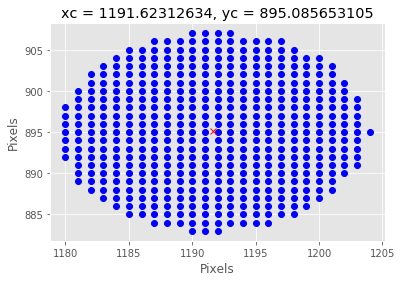

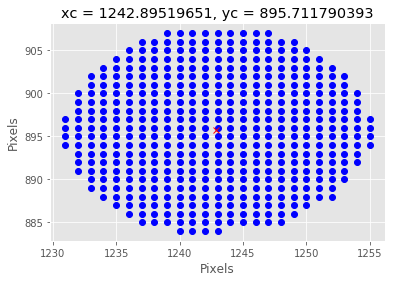

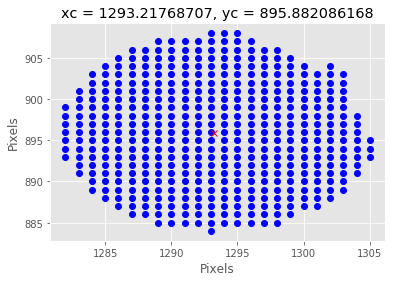

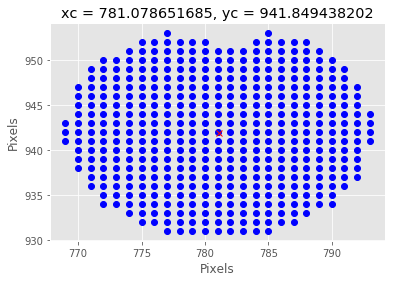

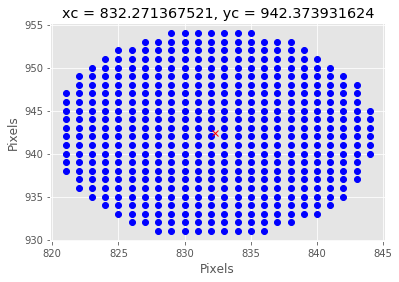

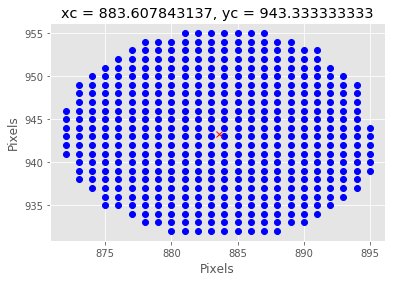

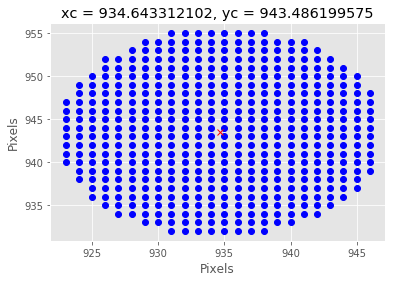

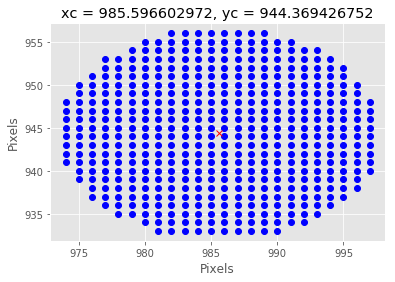

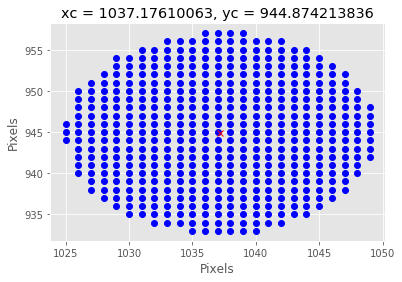

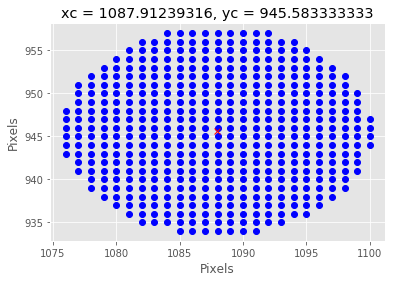

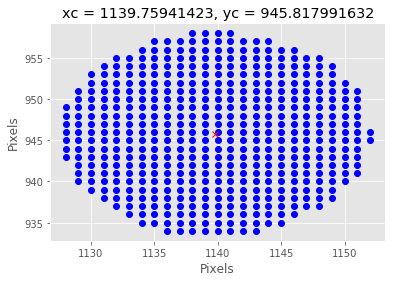

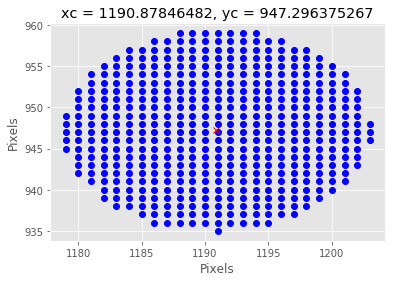

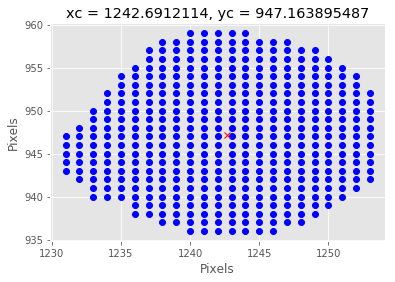

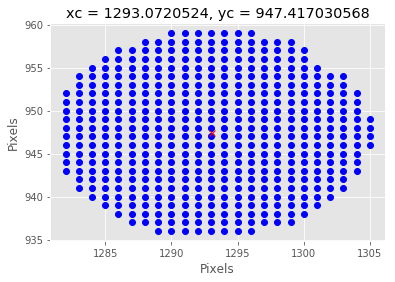

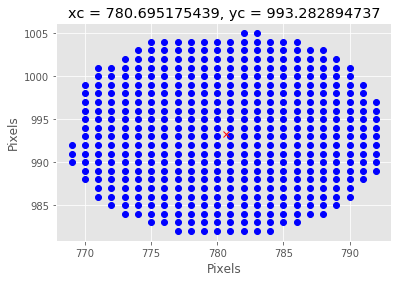

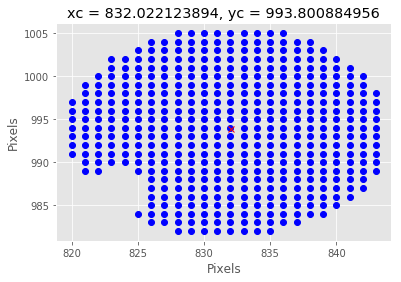

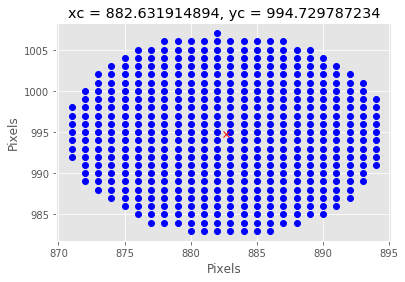

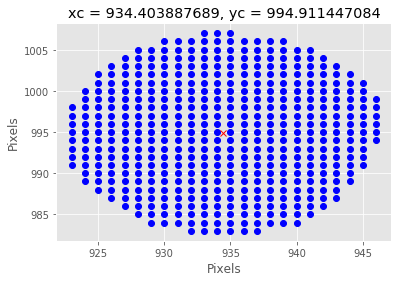

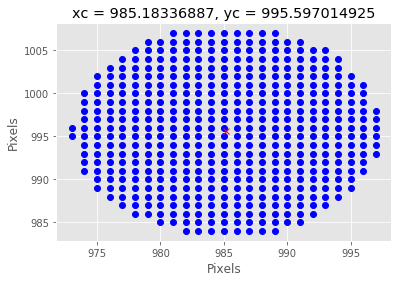

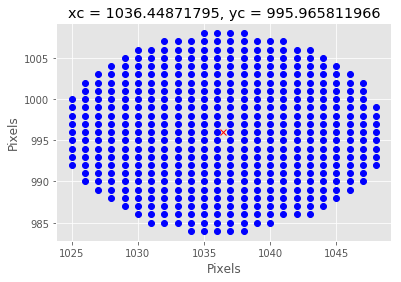

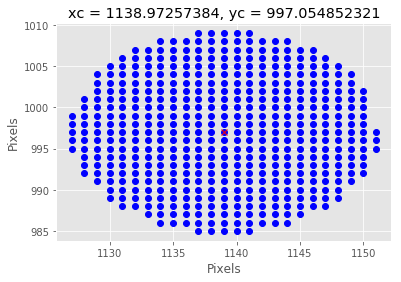

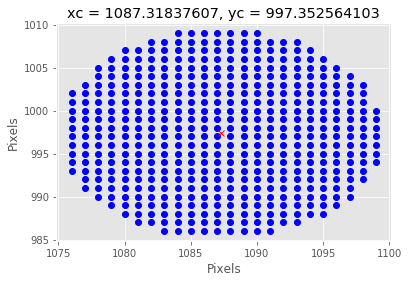

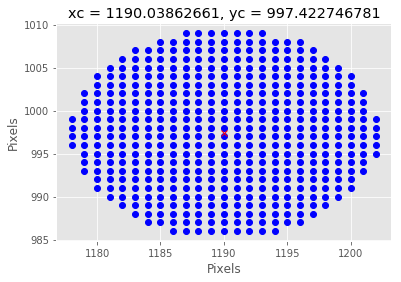

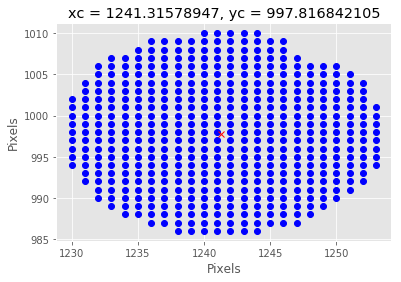

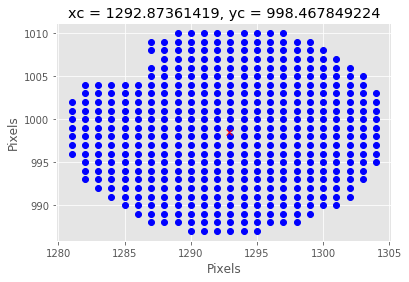

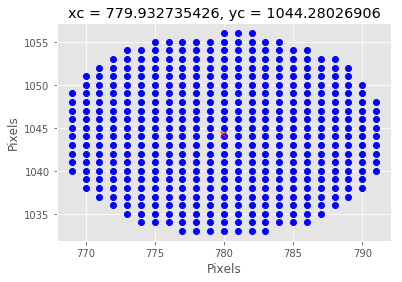

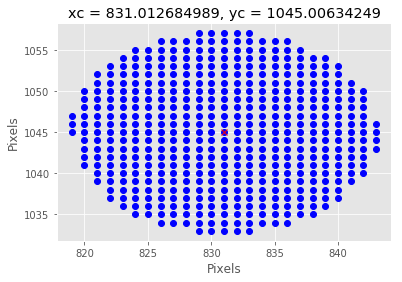

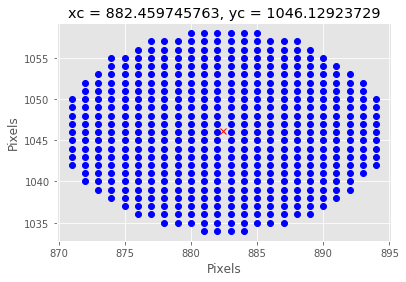

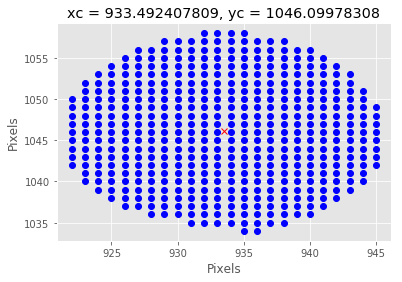

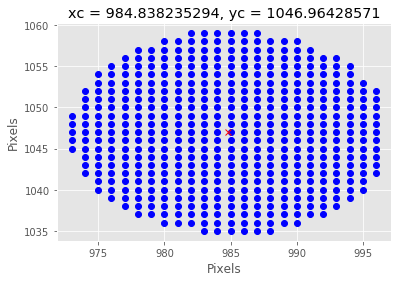

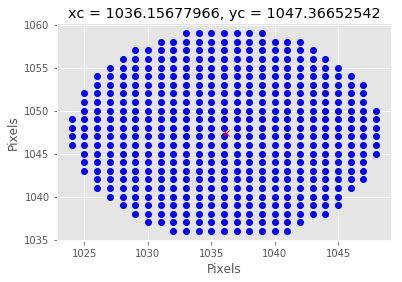

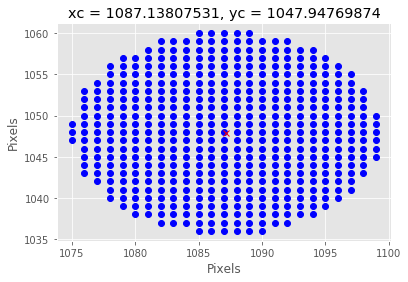

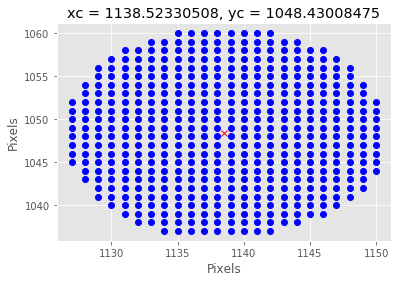

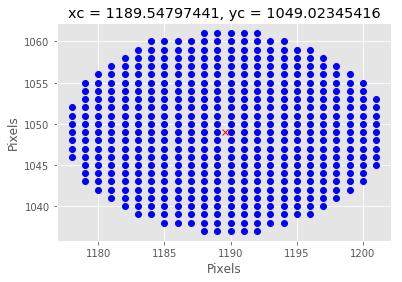

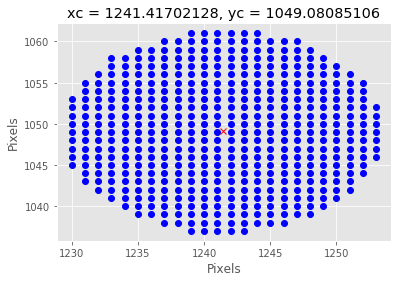

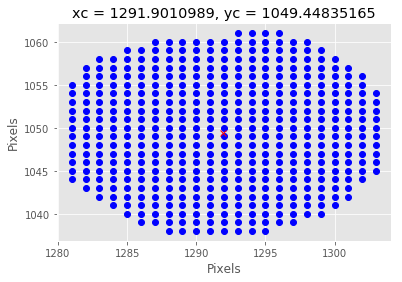

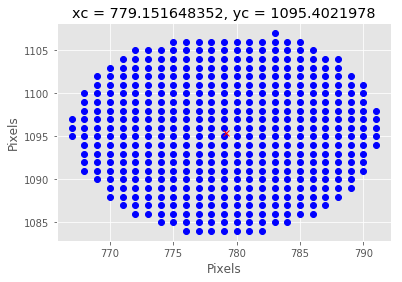

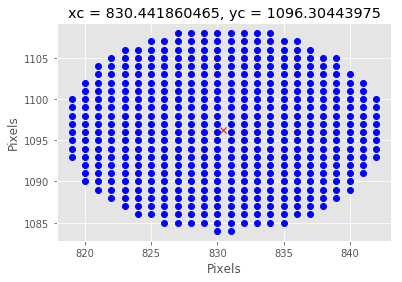

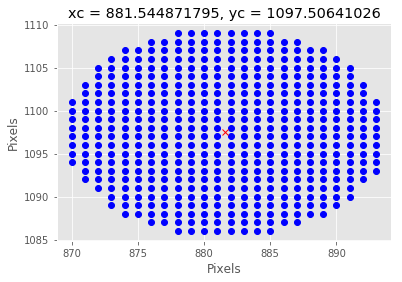

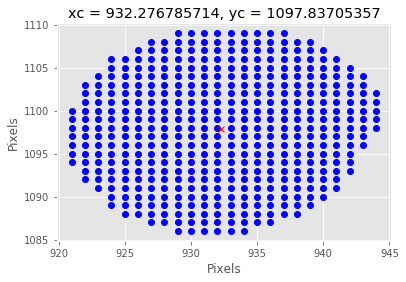

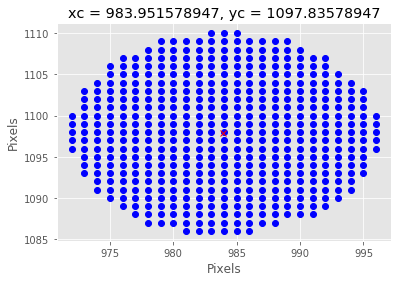

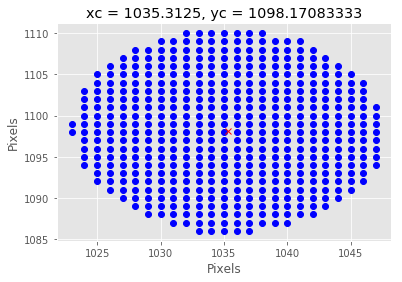

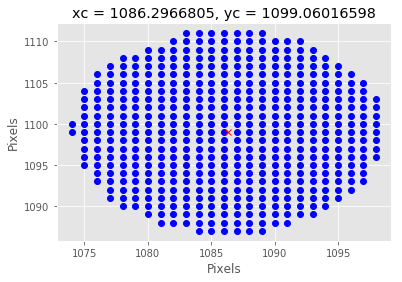

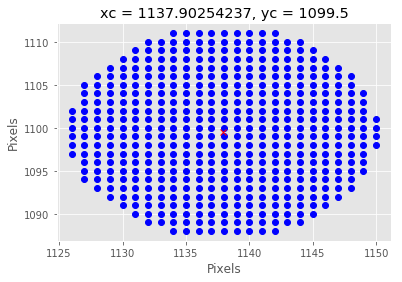

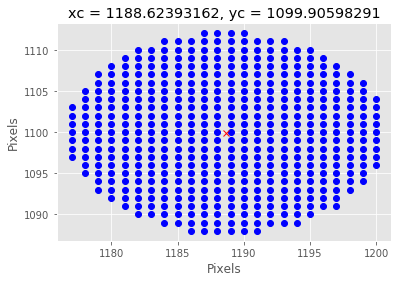

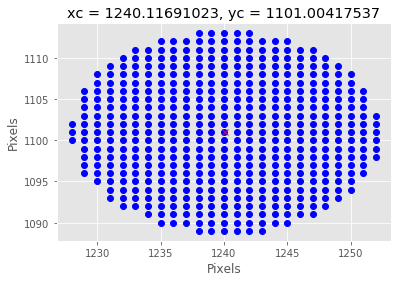

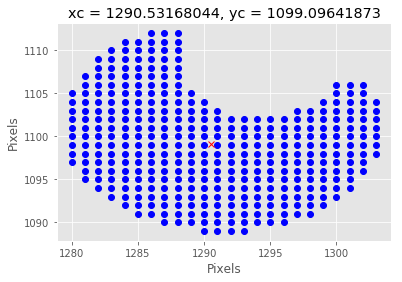

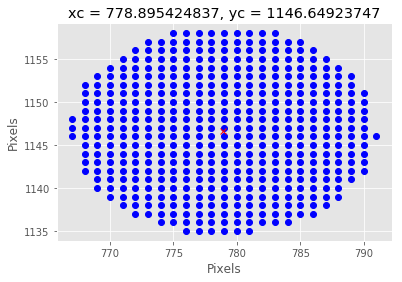

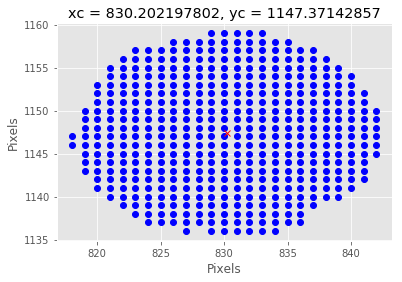

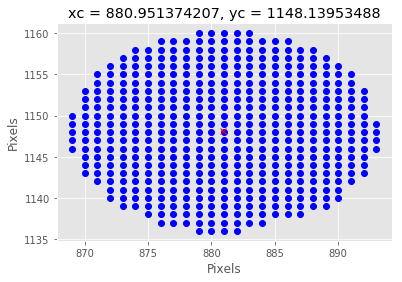

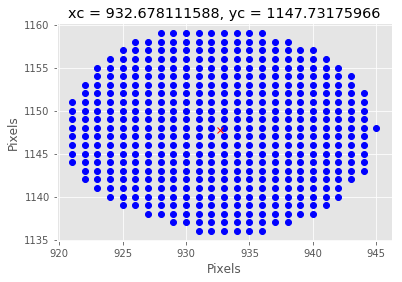

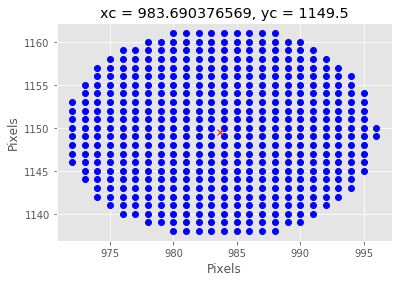

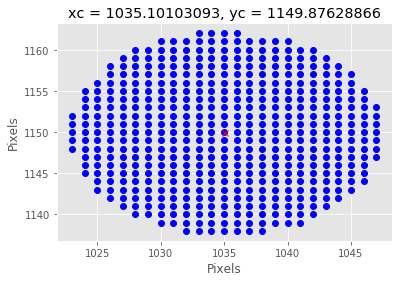

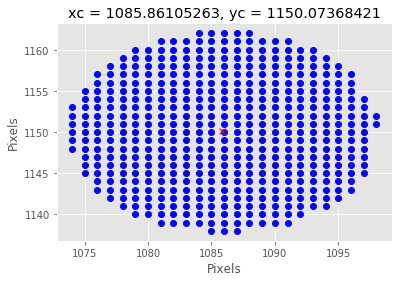

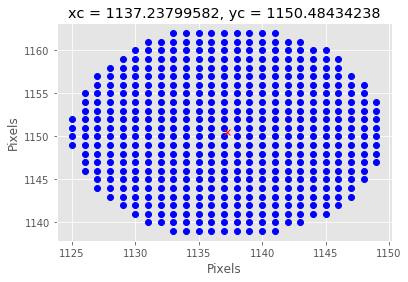

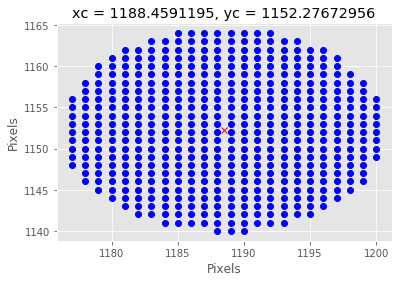

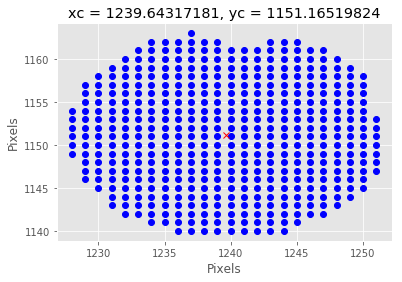

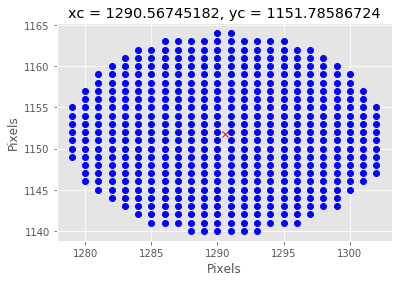

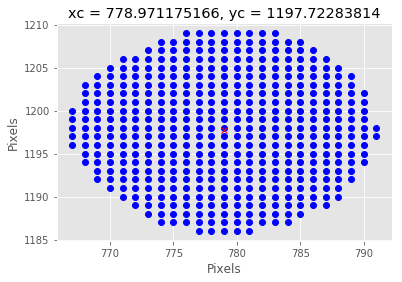

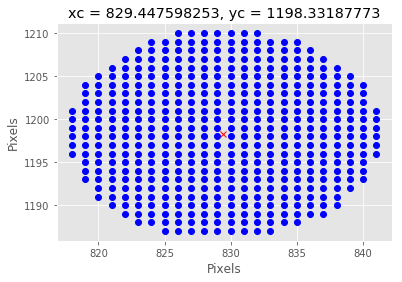

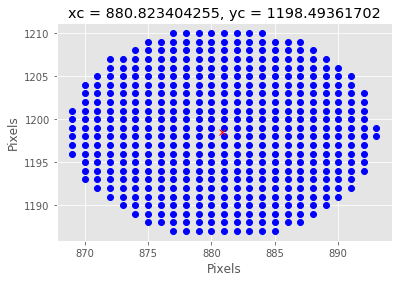

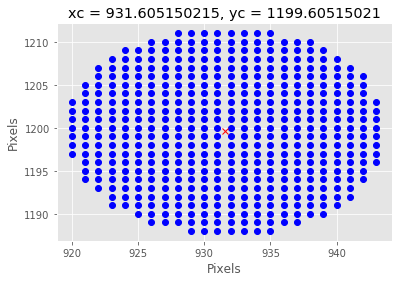

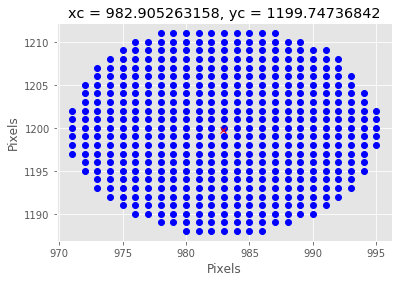

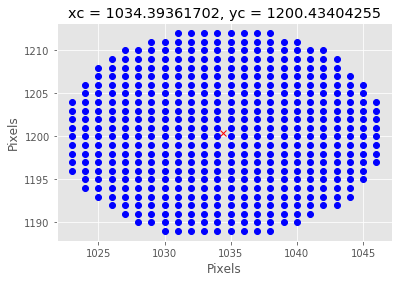

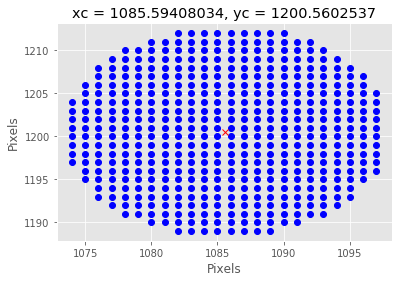

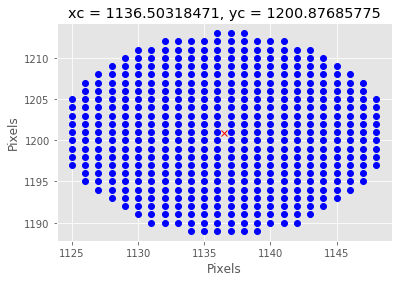

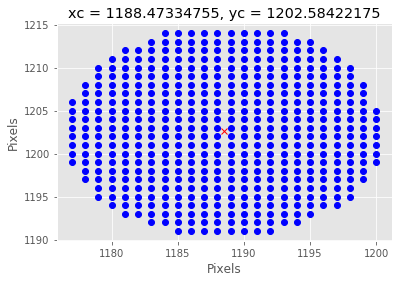

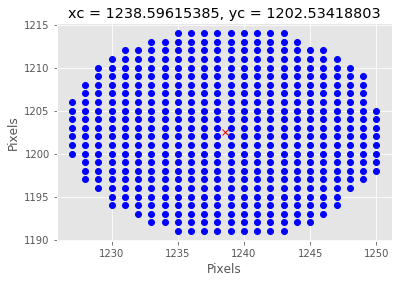

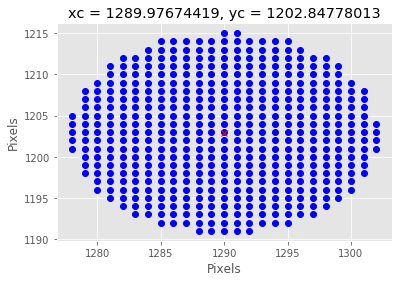

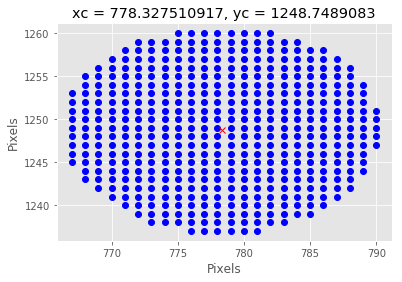

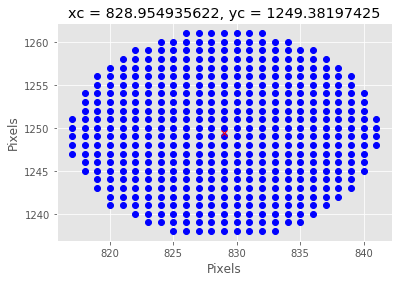

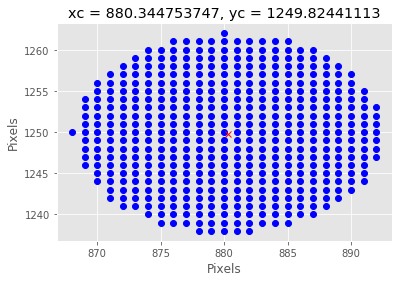

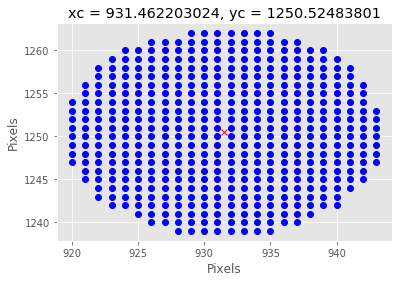

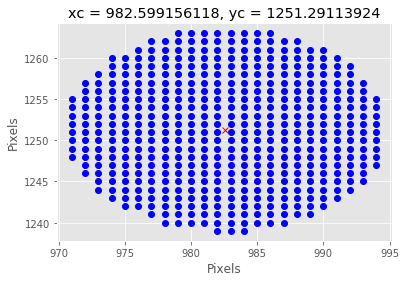

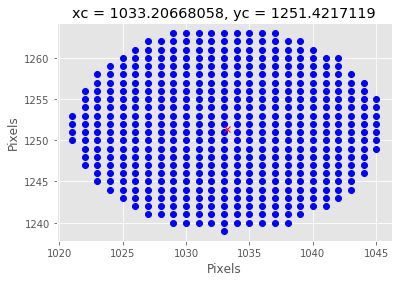

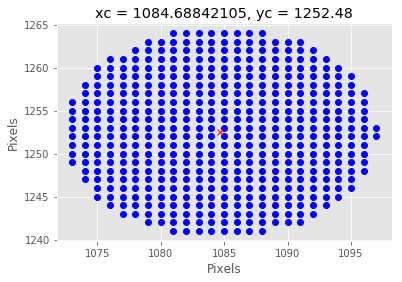

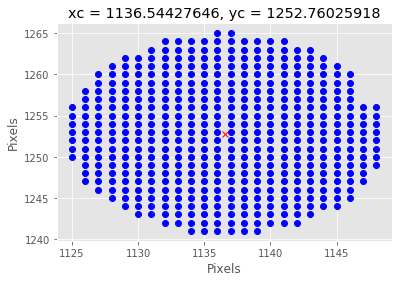

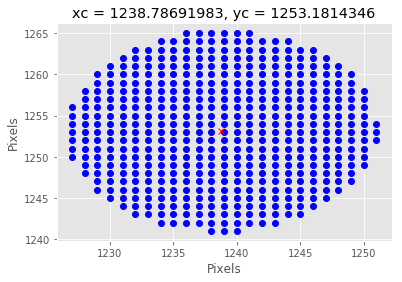

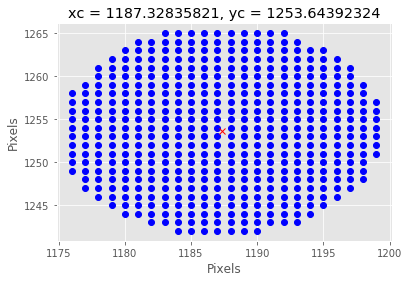

In [284]:
for i in np.arange(numb-19):
    y, x = props[i].coords[:,0], props[i].coords[:,1]
    yc, xc = props[i].centroid
    plt.plot(x,y,'bo')
    plt.plot(xc,yc,'rx')
    #plt.title('Feature# '+str(label),fontsize=22)
    plt.xlabel('Pixels')
    plt.ylabel('Pixels')
    plt.title('xc = '+str(xc)+', yc = '+str(yc))
    plt.show()
#plt.show()

In [420]:
centers.shape

(121, 2)

In [16]:
centers

array([[  695.80562061,  1161.19437939],
       [  718.10648148,  1114.97453704],
       [  741.40546697,  1069.61275626],
       [  741.96437055,  1183.74821853],
       [  763.78684807,  1023.75736961],
       [  764.15207373,  1138.16820276],
       [  787.08894231,   978.14423077],
       [  787.12727273,  1092.35681818],
       [  787.31414868,  1205.86330935],
       [  809.56912442,   931.80875576],
       [  809.96428571,  1046.44196429],
       [  810.05080831,  1160.98383372],
       [  832.70627803,  1115.02914798],
       [  832.9       ,   886.19302326],
       [  833.04861111,  1000.17361111],
       [  833.29587156,  1229.14908257],
       [  855.19512195,   840.39689579],
       [  855.63370787,   954.3258427 ],
       [  855.59728507,  1068.59954751],
       [  855.99749373,  1184.14536341],
       [  877.9753915 ,   794.31991051],
       [  878.41333333,   908.25555556],
       [  878.86455982,  1022.96839729],
       [  879.52549889,  1137.99334812],
       [  878.83

In [7]:
#X = centers[:,1]
#Y = centers[:,0]
p = '/home/fatima/Desktop/solar_orbiter_project/codes/dont_touch/'

f = np.loadtxt('centers_FDT')
X = f[:,0]
Y = f[:,1]

In [22]:
'''
p = '/home/fatima/Desktop/solar_orbiter_project/codes/dont_touch/'
f = open('centers_FDT','w')
for n in np.arange(len(X)):
    f.write(str(X[n])+ ' '+ str(Y[n])+'\n')
f.close()
'''

"\np = '/home/fatima/Desktop/solar_orbiter_project/codes/dont_touch/'\nf = open('centers_FDT','w')\nfor n in np.arange(len(X)):\n    f.write(str(X[n])+ ' '+ str(Y[n])+'\n')\nf.close()\n"

(0, 2048)

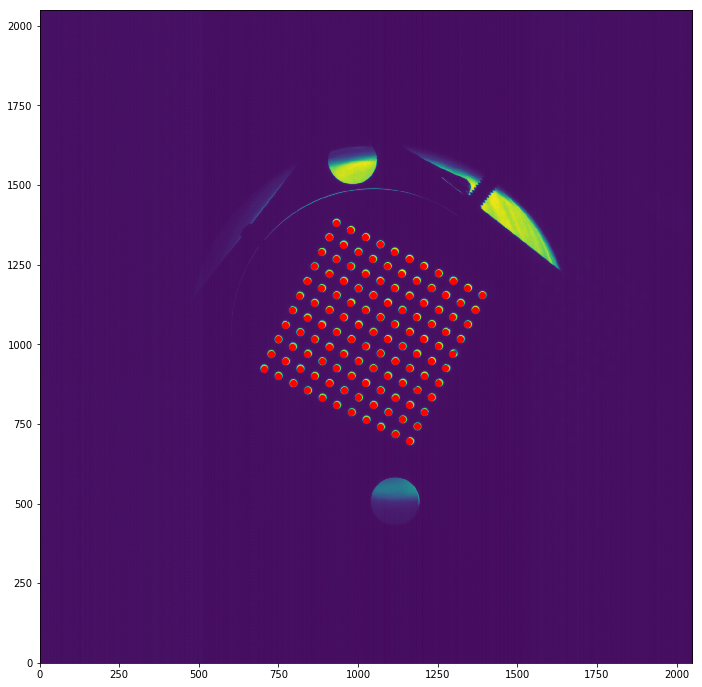

In [10]:
fig = plt.figure(figsize=(18,12))

plt.scatter(X,Y,color='red')
plt.imshow(I)
plt.xlim(0,2048)
plt.ylim(0,2048)


In [11]:

Ny, Nx = I.shape
i,j = np.indices([Ny,Nx])
center = np.array([(i.max()-i.min())/2.0, (j.max()-j.min())/2.0])
xc =center[1]
yc = center[0]
print xc, yc
import math
#theta = math.radians(26.5)
theta = math.radians(26.5)
ind = np.where(X==X[0])
fat_x = X[ind]; fat_y = Y[ind]
x_p =  xc+(X-xc)* np.cos(theta) - (Y-yc) * np.sin(theta)
y_p = yc+(X-xc)* np.sin(theta) + (Y-yc) * np.cos(theta)
fat_x_r= xc+ (fat_x-xc)* np.cos(theta) - (fat_y-yc) * np.sin(theta)
fat_y_r =yc+(fat_x-xc)* np.sin(theta) + (fat_y-yc) * np.cos(theta)
print fat_x,fat_y
print fat_x_r, fat_y_r
print xc,yc


1023.5 1023.5
[ 1161.19437939] [ 695.80562061]
[ 1292.94394697] [ 791.67397074]
1023.5 1023.5


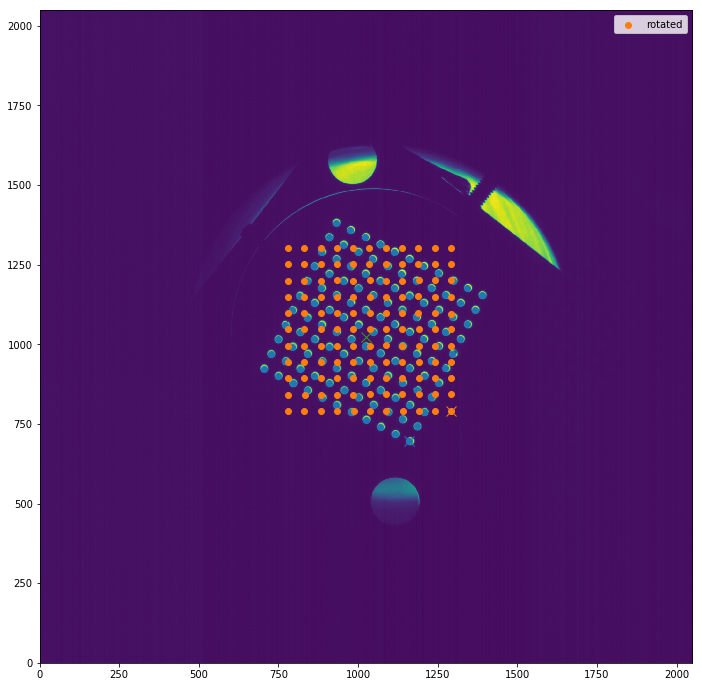

In [12]:
plt.figure(figsize=(12,12))
plt.scatter(X,Y)
plt.scatter(x_p,y_p,label='rotated')
plt.plot(fat_x,fat_y,'x',markersize=10)
plt.plot(fat_x_r, fat_y_r,'x',markersize=10)
plt.plot(xc,yc,'x',markersize=10)
plt.imshow(I)
plt.xlim(0,2048)
plt.ylim(0,2048)
plt.legend()

In [306]:
#Xp = np.reshape(X,(11,11))

In [307]:
#Yp = np.reshape(X,(11,11))

In [13]:
s = zip(y_p,x_p)
s.sort()
y = [p[0] for p in s]
x = [p[1] for p in s]

In [14]:
Xp = np.reshape(x,(11,11))
Yp = np.reshape(y,(11,11))

In [52]:
print Xp

[[  779.78814485   779.96568313   779.96983946   780.11489475
    780.20765479   780.2792542    780.41341892   780.49032086
    780.49627081   780.5128985    781.20479056]
 [  830.77829213   830.90201659   830.93060394   831.11553769
    831.14050812   831.22476614   831.53805108   831.53883618
    831.64874773   831.72985665   832.03343441]
 [  882.07939301   882.26734528   882.27717594   882.28794238
    882.37889999   882.73283428   882.81908608   882.83497018
    882.85521591   883.22548963   883.33162499]
 [  933.00164195   933.14306729   933.47084991   933.53399626
    933.67676252   933.6853023    933.96967311   933.97576634
    934.14100295   934.26348815   934.73200884]
 [  983.95071637   984.45364486   984.62613747   984.63656555
    984.83553585   984.85562748   984.96662447   985.00996321
    985.08195041   985.10114006   985.6645716 ]
 [ 1035.09969927  1035.47978763  1035.87212619  1035.99209063
   1036.19051139  1036.32439565  1036.34172047  1036.44379382
   1036.49524214

In [53]:
1292-779

513

In [15]:
print Xp[0,:]

[  883.33162499  1241.62962651   831.64874773  1036.89784371   934.73200884
  1139.61376933   781.20479056  1190.63785381   985.6645716   1292.94394697
  1088.39566056]


In [54]:
print Yp

[[ 1097.5936981   1148.8916973   1302.07892456  1046.44060265
   1250.92284838   943.88939832   893.15672703   995.36536987
    842.01502046  1199.98390784   791.43264265]
 [ 1301.79899643  1250.94402203  1200.00540198  1097.89729517
   1046.74689692  1149.1700773    893.39811894   944.03697678
    791.07434285   995.57458987   842.1409749 ]
 [ 1149.25548419  1251.09167207  1098.63838549  1199.72102868
    996.02807097  1047.34102484   842.05219482  1302.8239069    944.60614654
    894.47790537   791.00537266]
 [ 1098.61379784  1200.42865597  1251.31099475  1302.53971671  1148.5330851
   1046.84591342   841.96527985   944.26419824   995.69814111
    893.04580691   791.17797674]
 [ 1302.51377109  1200.20272036  1098.20158518  1251.59825065
    995.96653851  1149.76730276   944.6795317   1047.27337639
    893.87565727   842.23513751   791.65943793]
 [ 1251.32681603  1303.00146476  1200.37480507  1098.00051637
    995.80561346  1149.79204712  1047.16302061   944.78706408   842.4053293
   

# I have a problem with the way skimage sort out the coordinates of features. I have solved it here

In [96]:
'''
Yo = np.zeros((11,11))
Xo = np.zeros((11,11))
for n in range(len(Xp)):
    x = Xp[n,:]
    y = Yp[n,:]
    s = zip(x,y)
    s.sort()
    x = [p[0] for p in s]
    y = [p[1] for p in s]
    Yo[n,:] = y
    Xo[n,:] = x
'''    

'\nYo = np.zeros((11,11))\nXo = np.zeros((11,11))\nfor n in range(len(Xp)):\n    x = Xp[n,:]\n    y = Yp[n,:]\n    s = zip(x,y)\n    s.sort()\n    x = [p[0] for p in s]\n    y = [p[1] for p in s]\n    Yo[n,:] = y\n    Xo[n,:] = x\n'

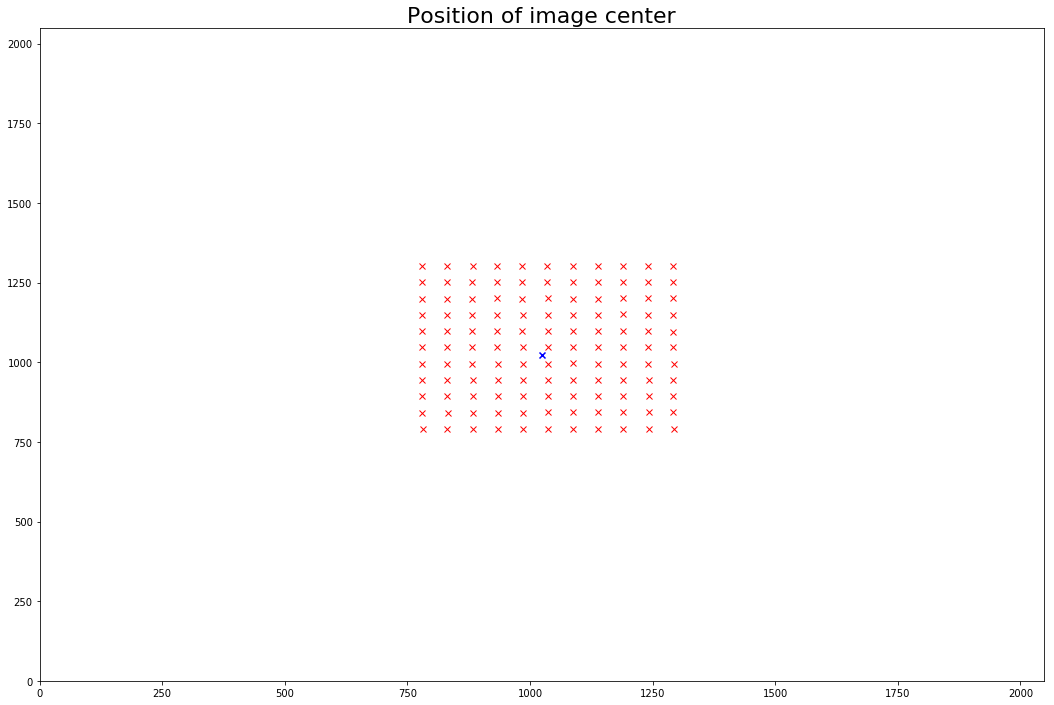

In [16]:
fig = plt.figure(figsize=(18,12))

Ny, Nx = I.shape
i,j = np.indices([Ny,Nx])
center = np.array([(i.max()-i.min())/2.0, (j.max()-j.min())/2.0])
xc = center[1]
yc = center[0]
plt.scatter(xc,yc,marker='x',color='b')
plt.plot(Xp,Yp,'rx')
plt.xlim(0,2048)
plt.ylim(0,2048)
plt.title('Position of image center',fontsize=22)


In [ ]:
750-

In [17]:
def parabola_lines(x,a,b,c):
    y = a*x**2 + b*x + c
    return y
def parabola_columns(y,m,n,p):
    x = m*y**2 + n*y + p
    return x


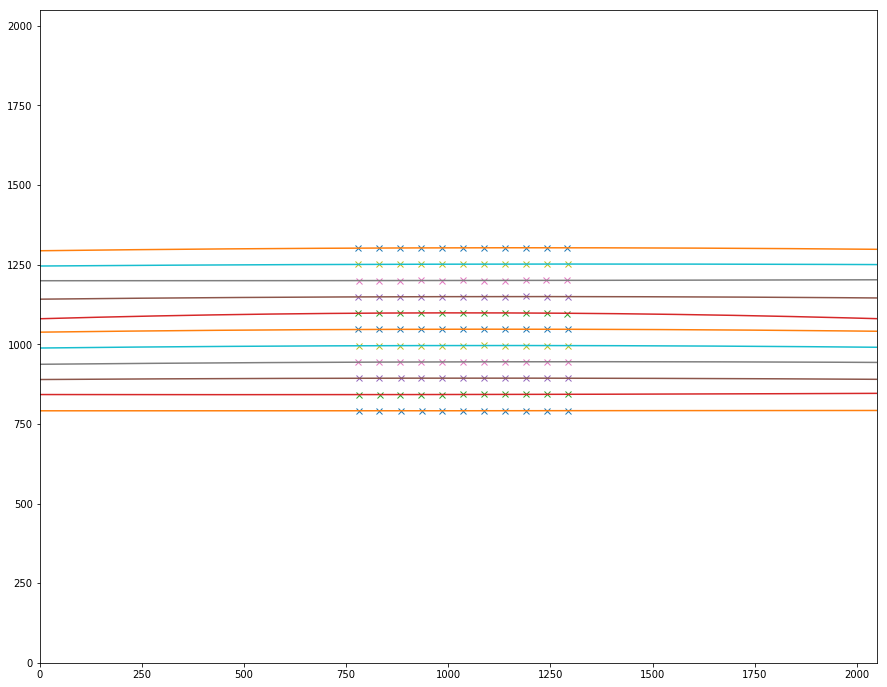

In [18]:
fig=plt.figure(figsize=(15,12))
ax = fig.add_subplot(111)
A = np.zeros(11)
B = np.zeros(11)
C = np.zeros(11)
n=0
for m in range(11):
    x = Xp[m,:]; y = Yp[m,:]
    temp1 = np.array([[x[0]**2,x[1]**2,x[2]**2], [x[0],x[1],x[2]],[1,1,1]])
    temp2 = np.array([y[0], y[1],y[2]])
    p0 = np.linalg.solve(temp1,temp2)   ## estimating the guess array for each line
    popt, pcov = curve_fit(parabola_lines, x,y,p0)
     ## GOODNESS OF FIT
    chi_sq_w_lines = np.sum((parabola_lines(x,*popt)-y)**2)
    red_chi_sq_lines = chi_sq_w_lines/(len(x)-len(popt))
    #print chi_sq_w_lines, red_chi_sq_lines
    A[n] = popt[0]; B[n] = popt[1]; C[n] = popt[2]
    xnew = np.linspace(0, 2048, 1000)
    ynew = parabola_lines(xnew, *popt)
    ax.plot(x,y,'x')
    ax.plot(xnew, ynew,label=str(n))
    ax.set_xlim(0,2048)
    ax.set_ylim(0,2048)
    n=n+1
    

#plt.legend()
#plt.savefig('parabolas_zemax.png',dpi=300)
#plt.show()

In [19]:
s = zip(x_p,y_p)
s.sort()
x = [p[0] for p in s]
y = [p[1] for p in s]

In [20]:
Xp = np.reshape(x,(11,11))
Yp = np.reshape(y,(11,11))

0.551031579272 0.068878947409
0.281388147846 0.0351735184807
0.55812714345 0.0697658929312
0.740744784528 0.092593098066
0.402480503159 0.0503100628949
0.557584841433 0.0696981051791
0.405763589011 0.0507204486264
0.283707403459 0.0354634254324
0.599364247426 0.0749205309283
1.09391259367 0.136739074209
1.88416423362 0.235520529203


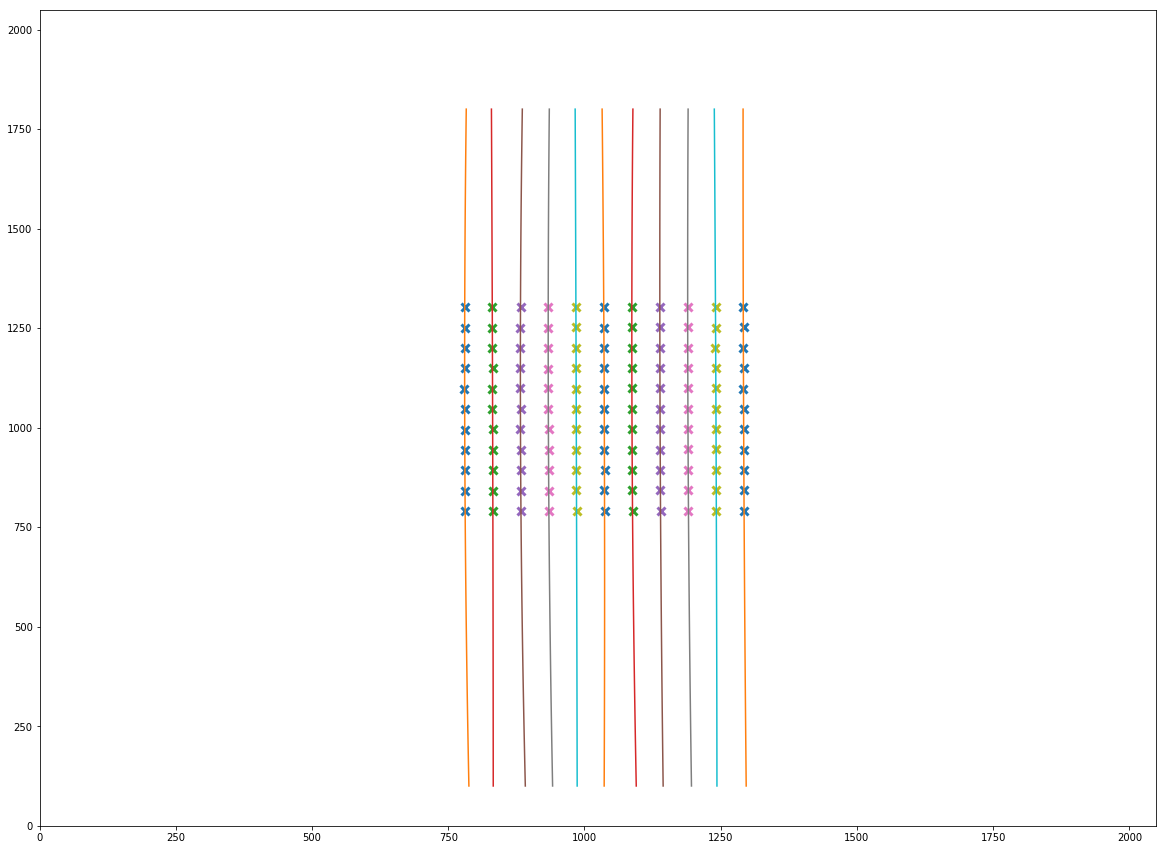

In [21]:
plt.clf()
fig=plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
n=0
M = np.zeros(11)
N =  np.zeros(11)
P =  np.zeros(11)
for m in range(11):
    x = Xp[m,:]; y = Yp[m,:]
    temp1 = np.array([[x[0]**2,x[1]**2,x[2]**2], [x[0],x[1],x[2]],[1,1,1]])
    temp2 = np.array([y[0], y[1],y[2]])
    p0 = np.linalg.solve(temp1,temp2)
    popt, pcov = curve_fit(parabola_columns, y,x,p0)
    chi_sq_w_cols = np.sum((parabola_columns(y,*popt)-x)**2)
    red_chi_sq_cols = chi_sq_w_cols/(len(x)-len(popt))
    print chi_sq_w_cols ,red_chi_sq_cols

    
    M[n]=popt[0]; N[n] = popt[1]; P[n] = popt[2]
    ynew = np.linspace(100, 1800, 100)
    xnew = parabola_columns(ynew, *popt)
    ax.plot(x,y,'x',markersize=8,mew=3)
    ax.plot(xnew, ynew,label=str(n))
    ax.set_xlim(0,2048)
    ax.set_ylim(0,2048)
    n = n+1
#plt.legend()
plt.show()

In [22]:
print xc, yc


1023.5 1023.5


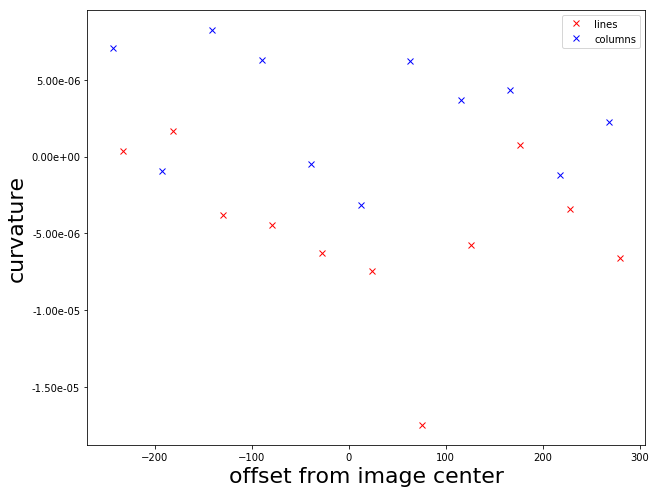

In [23]:
C_2 = A*xc**2 + B*xc + C - yc
P_2 = M*yc**2 + N*yc + P - xc
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.plot(C_2,A,'rx',label='lines')
ax.plot(P_2,M,'bx',label='columns')
ax.set_xlabel('offset from image center',fontsize=22)
ax.set_ylabel('curvature',fontsize=22)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
plt.legend(loc='best')

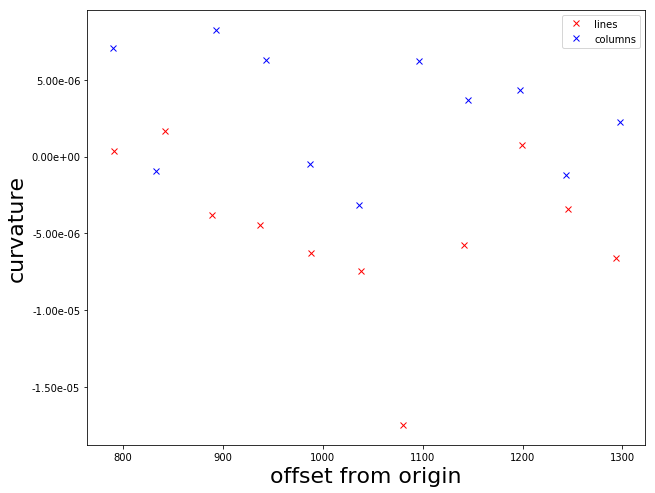

In [24]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.plot(C,A,'rx',label='lines')
ax.plot(P,M,'bx',label='columns')
ax.set_xlabel('offset from origin',fontsize=22)
ax.set_ylabel('curvature',fontsize=22)
#ax.set_xlim(P.min(), P.max())
#ax.set_ylim(A.min(), A.max())
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
plt.legend(loc='best')

[ -9.86109292e-09  -4.54438169e-06]
2.77108763056e-10 3.07898625618e-11
[ -6.27764600e-09   3.02871167e-06]
1.51685624921e-10 1.68539583246e-11


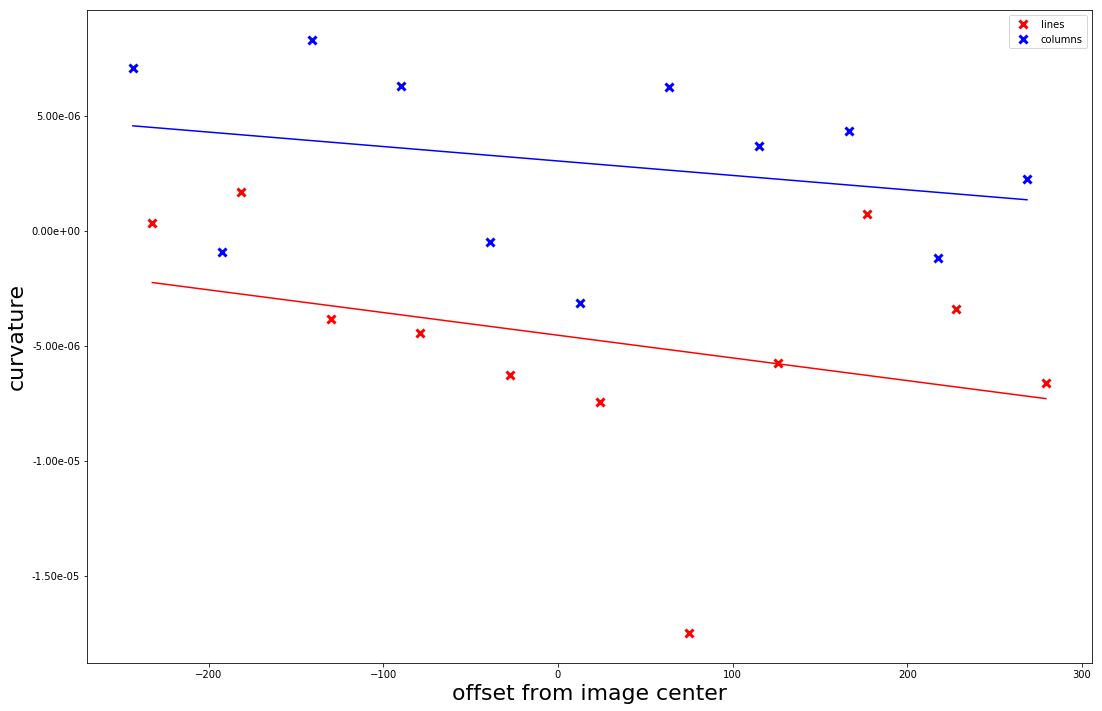

In [25]:
t = np.polyfit(C_2, A, 1)
tnew = np.linspace(C_2.min(),C_2.max(),100)
model = np.poly1d(t)
Tnew = model(tnew)
## GOODNESS OF FIT
chi_sq_w_lines = np.sum((model(A)-A)**2)
red_chi_sq_lines = chi_sq_w_lines/(len(A)-len(t))
print t
print chi_sq_w_lines,red_chi_sq_lines
## columns
t2 = np.polyfit(P_2, M, 1)
tnew2 = np.linspace(P_2.min(),P_2.max(),100)
model2 = np.poly1d(t2)
Tnew2 = model2(tnew2)
print t2
## goodness of fit
chi_sq_w_cols = np.sum((model2(M)-M)**2)
red_chi_sq_cols = chi_sq_w_cols/(len(M)-len(t2))
print chi_sq_w_cols ,red_chi_sq_cols

fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(111)
ax.plot(C_2,A,'rx',label='lines',markersize=8,mew=3)
ax.plot(tnew,Tnew,'r')
ax.plot(P_2,M,'bx',label='columns',markersize=8,mew=3)
ax.plot(tnew2, Tnew2, 'b')
ax.set_xlabel('offset from image center',fontsize=22)
ax.set_ylabel('curvature',fontsize=22)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
plt.legend(loc='best')

In [26]:
del_lines = -t[1]/t[0]
del_columns = -t2[1]/t2[0]
y_d = del_lines+yc
x_d = del_columns + xc
print 'the distortion center is:', (x_d,y_d)
del_lines, del_columns

the distortion center is: (1505.9597744510534, 562.66044300095427)


(-460.83955699904578, 482.45977445105348)

In [27]:
Ny, Nx = I.shape
i,j = np.indices([Ny,Nx])
center = np.array([(i.max()-i.min())/2.0, (j.max()-j.min())/2.0])
xd = center[1]
yd = center[0]
C_2 = A*xd**2 + B*xd + C - yd #lines
P_2 = M*yd**2 + N*yd + P - xd #columns
trials = 10
i=0
temp_x = temp_y = np.zeros((trials))


In [28]:
for n in range(trials):
    
    t = np.polyfit(C_2, A, 1)
    t2 = np.polyfit(P_2, M, 1)
    
    del_lines = -t[1]/t[0]
    del_columns = -t2[1]/t2[0]
    yd = del_lines+yd
    xd = del_columns + xd
    print 'the distortion center is:', (xd,yd)
    print del_lines, del_columns
   
    C_2 = A*xd**2 + B*xd + C - yd#lines
    P_2 = M*yd**2 + N*yd + P - xd #columns
    temp_x[i] = xd
    temp_y[i] = yd
    i=i+1


the distortion center is: (1505.9597744510534, 562.66044300095427)
-460.839556999 482.459774451
the distortion center is: (1515.4538956300512, 551.25580045454956)
-11.4046425464 9.494121179
the distortion center is: (1515.8957246635437, 550.8158413146466)
-0.439959139903 0.441829033492
the distortion center is: (1515.9129804937024, 550.79514855111961)
-0.020692763527 0.0172558301589
the distortion center is: (1515.9137924808665, 550.79433999122853)
-0.000808559891097 0.0008119871641
the distortion center is: (1515.9138242095848, 550.79430194305235)
-3.8048176196e-05 3.17287182372e-05
the distortion center is: (1515.9138257026364, 550.79430045630306)
-1.48674927065e-06 1.49305150439e-06
the distortion center is: (1515.9138257609779, 550.79430038634223)
-6.99607904543e-08 5.83415318088e-08
the distortion center is: (1515.913825763723, 550.79430038360817)
-2.73402984917e-09 2.74518180375e-09
the distortion center is: (1515.9138257638303, 550.79430038347982)
-1.28397128777e-10 1.0726286921

(0, 2048)

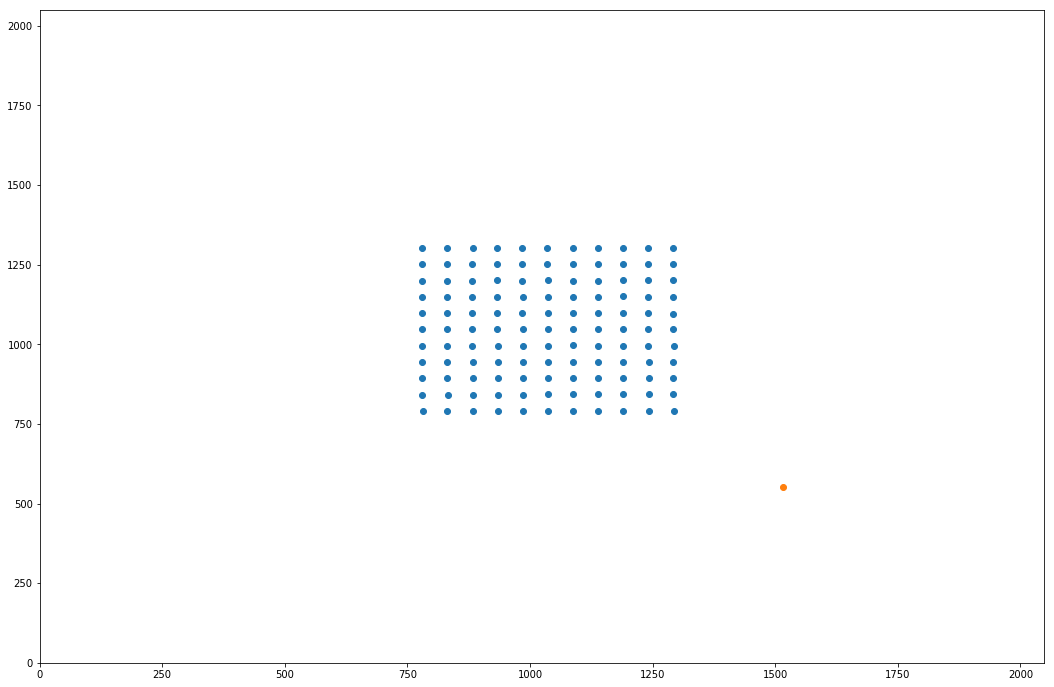

In [29]:
fig = plt.figure(figsize=(18,12))

plt.scatter(x_p,y_p)
plt.scatter(xd,yd)
plt.xlim(0,2048)
plt.ylim(0,2048)

In [30]:
#-26.6
theta = math.radians(-26.5)
print xc, yc
x_d_r = xc+ (xd-xc)* np.cos(theta) - (yd-yc) * np.sin(theta)
y_d_r = yc+(xd-xc)* np.sin(theta) + (yd-yc) * np.cos(theta)
print x_d_r, y_d_r
print xd

1023.5 1023.5
1253.25780339 380.745454287
1515.91382576


In [31]:
x_d = xd
y_d = yd

In [32]:
C_3 = A*x_d**2 + B*x_d + C - y_d
P_3 = M*y_d**2 + N*y_d + P - x_d
B_3 = 2*A*x_d + B
N_3 = 2*M*y_d + N

[ -9.63389189e-09  -4.84963502e-20]
5.27570603128e-10 5.86189559031e-11
[ -6.17127875e-09   3.12843516e-20]
2.47287522948e-10 2.74763914387e-11


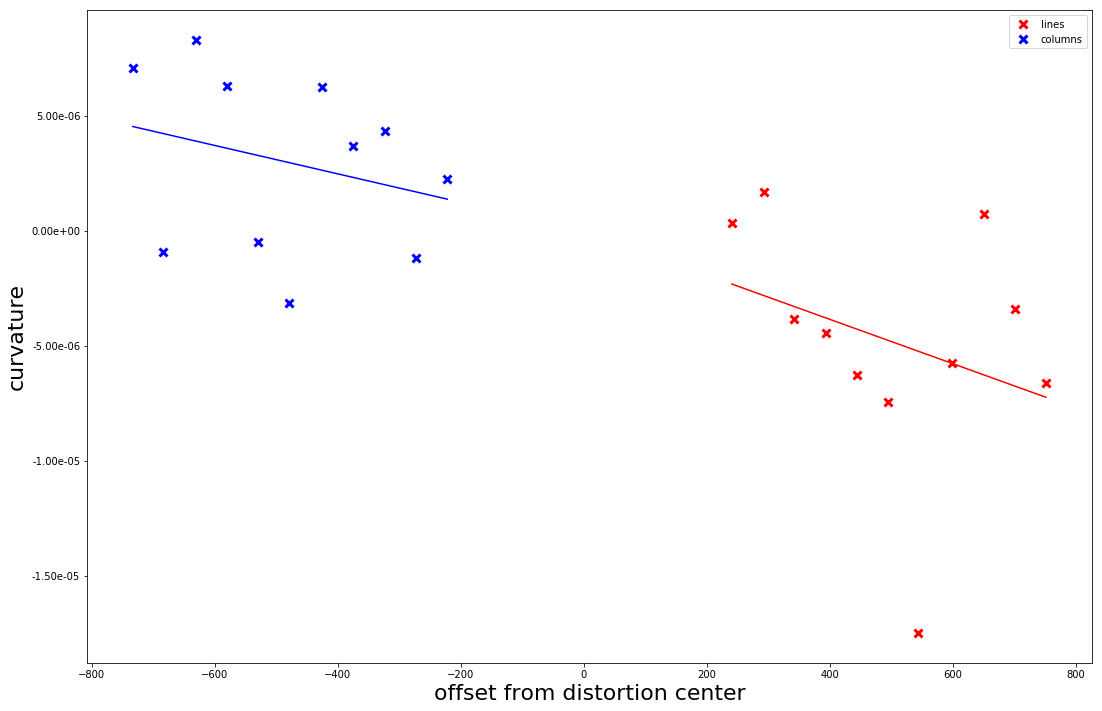

In [33]:
t = np.polyfit(C_3, A, 1)
tnew = np.linspace(C_3.min(),C_3.max(),100)
model = np.poly1d(t)
Tnew = model(tnew)
## GOODNESS OF FIT
chi_sq_w_lines = np.sum((model(A)-A)**2)
red_chi_sq_lines = chi_sq_w_lines/(len(A)-len(t))
print t
print chi_sq_w_lines,red_chi_sq_lines
## columns
t2 = np.polyfit(P_3, M, 1)
tnew2 = np.linspace(P_3.min(),P_3.max(),100)
model2 = np.poly1d(t2)
Tnew2 = model2(tnew2)
print t2
## goodness of fit
chi_sq_w_cols = np.sum((model2(M)-M)**2)
red_chi_sq_cols = chi_sq_w_cols/(len(M)-len(t2))
print chi_sq_w_cols ,red_chi_sq_cols

fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(111)
ax.plot(C_3,A,'rx',label='lines',markersize=8,mew=3)
ax.plot(tnew,Tnew,'r')
ax.plot(P_3,M,'bx',label='columns',markersize=8,mew=3)
ax.plot(tnew2, Tnew2, 'b')
ax.set_xlabel('offset from distortion center',fontsize=22)
ax.set_ylabel('curvature',fontsize=22)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
plt.legend(loc='best')

[ -1.44392819e-09  -5.69005547e-09   1.12123107e-08   1.13752373e-08
   1.42523526e-08   1.52010420e-08   3.30871484e-08   9.74809160e-09
  -1.12604486e-09   4.89422985e-09   8.94021119e-09]
9.13187228584e-09
9.7914622954e-09


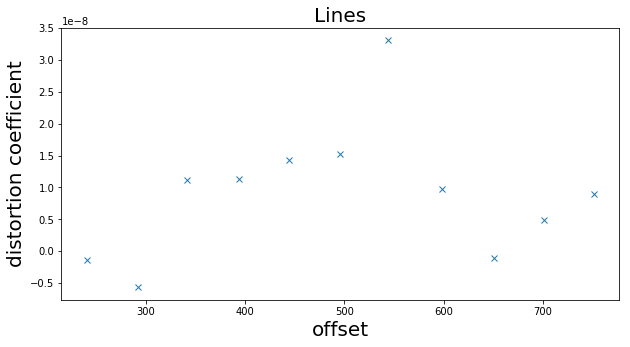

In [34]:
k_lines = (-A)/(C_3*(3*A*C_3 + 3*B_3**2 + 1))
plt.figure(figsize=(10,5))
plt.plot(C_3, k_lines,'x')
plt.ylabel('distortion coefficient',fontsize=20)
plt.xlabel('offset',fontsize=20)
plt.title('Lines',fontsize=20)
print k_lines
print k_lines.mean()
print np.average(k_lines,weights=np.abs(C_3))
#plt.savefig('k_lines.png')

[  9.77174255e-09  -1.34758021e-09   1.33352095e-08   1.09811544e-08
  -9.08768421e-10  -6.55945099e-09   1.48030399e-08   9.89211236e-09
   1.34699273e-08  -4.36047233e-09   1.02260873e-08]
6.30027285367e-09
6.24924710525e-09


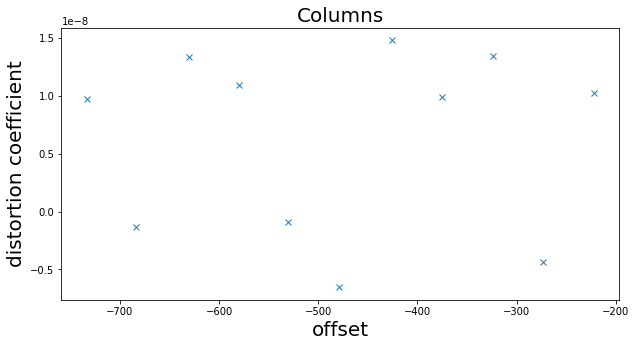

In [35]:
plt.figure(figsize=(10,5))
plt.ylabel('distortion coefficient',fontsize=20)
plt.xlabel('offset',fontsize=20)
plt.title('Columns',fontsize=20)
k_cols = (-M)/(P_3*(3*M*P_3+ 3*N_3**2 + 1))
plt.plot(P_3,k_cols,'x')
print k_cols
print k_cols.mean()
print np.average(k_cols,weights=np.abs(P_3))
#plt.savefig('k_cols.png')

In [36]:
K = np.array([np.average(k_lines, weights=np.abs(C_3)), np.average(k_cols, weights=np.abs(P_3))])
print K.mean()
k = K.mean()

8.02035470033e-09


# Distortion in the rotated frame

In [37]:
X_d = x_p
Y_d = y_p

In [39]:
k= K.mean()
x_d = xd
y_d = yd
print xd,yd

1515.91382576 550.794300383


In [40]:
X_u = X_d + (X_d - x_d )*(k*((X_d-x_d)**2 + (Y_d-y_d)**2))
Y_u = Y_d + (Y_d - y_d)*(k*((X_d-x_d)**2 + (Y_d-y_d)**2))


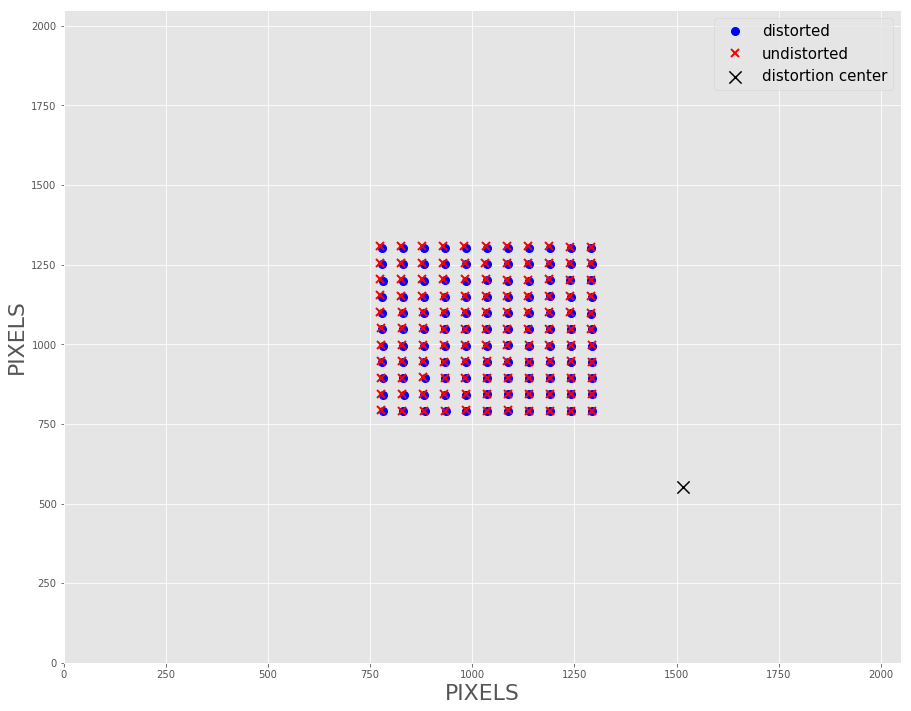

In [41]:
fig = plt.figure(figsize=(15,12))
plt.style.use('ggplot')
ax = fig.add_subplot(111)

#plt.scatter(xc,yc,marker='x',color='m',label='image center')
plt.scatter(x_d,y_d,marker='x',color='k',s=150,alpha=1,label='distortion center')
#plt.plot(lines[:,0], lines[:,1],'rx')
ax.plot(X_d, Y_d,'bo', markersize=8 ,label='distorted')
ax.plot(X_u,Y_u, 'rx', markersize=8,mew=2, label='undistorted')
plt.xlim(0,2048)
plt.ylim(0,2048)
plt.xlabel('PIXELS',fontsize=22)
plt.ylabel('PIXELS',fontsize=22)
#rec = plt.Rectangle((0,0), width=Nx,height=Ny, fill='False')
#ax.add_patch(rec)
rms = 4.5 
percent = -0.4
k=8e-09
textstr = '\n'.join((
    r'RMS error=%.2f' % (rms, ) +' pixels',
    r'percentage of Distortion=%.2f' % (percent, )+'%',
    r'Distortion coefficient k=%.2E' % (k, )))
text = r'$r_u = r_d \times (1+k\times r_d^2)$'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,verticalalignment='top', bbox=props)

#ax.text(0.4, 0.95, text, transform=ax.transAxes, fontsize=20,verticalalignment='top', bbox=props)

plt.legend(loc='upper right',prop={'size': 15} )
#plt.savefig('distortion.png',dpi=300)

# distortion in the initial frame:


In [42]:
d_d = np.sqrt((X_d-x_d)**2 + (Y_d-x_d)**2)
d_u = np.sqrt((X_u-x_d)**2 + (Y_u-x_d)**2)
d_m_pixels = np.sqrt((1./len(X_u))*np.sum((d_d-d_u)**2))
print d_m_pixels

1.28746923935


In [47]:
X_d = f[:,0] #centers[:,1]
Y_d = f[:,1]#centers[:,0]

In [48]:
k= K.mean()
x_d = x_d_r 
y_d = y_d_r

In [49]:
X_u = X_d + (X_d - x_d )*(k*((X_d-x_d)**2 + (Y_d-y_d)**2))
Y_u = Y_d + (Y_d - y_d)*(k*((X_d-x_d)**2 + (Y_d-y_d)**2))


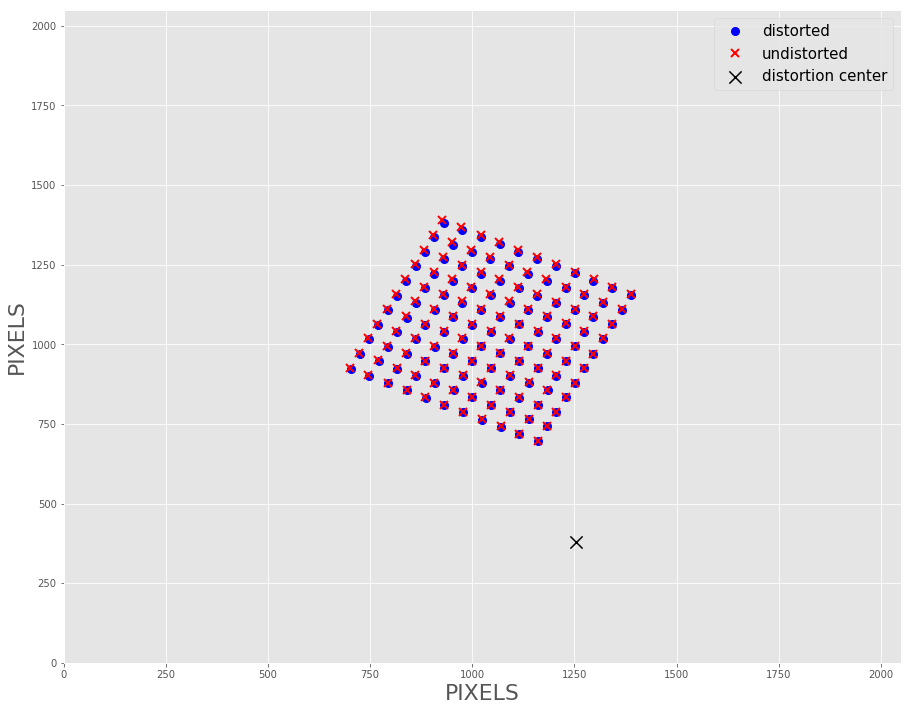

In [50]:
fig = plt.figure(figsize=(15,12))
plt.style.use('ggplot')
ax = fig.add_subplot(111)

#plt.scatter(xc,yc,marker='x',color='m',label='image center')
plt.scatter(x_d_r,y_d_r,marker='x',color='k',s=150,alpha=1,label='distortion center')
#plt.plot(lines[:,0], lines[:,1],'rx')
ax.plot(X_d, Y_d,'bo', markersize=8 ,label='distorted')
ax.plot(X_u,Y_u, 'rx', markersize=8,mew=2, label='undistorted')
plt.xlim(0,2048)
plt.ylim(0,2048)
plt.xlabel('PIXELS',fontsize=22)
plt.ylabel('PIXELS',fontsize=22)
#rec = plt.Rectangle((0,0), width=Nx,height=Ny, fill='False')
#ax.add_patch(rec)
rms = 4.5 
percent = -0.4
k=8e-09
textstr = '\n'.join((
    r'RMS error=%.2f' % (rms, ) +' pixels',
    r'percentage of Distortion=%.2f' % (percent, )+'%',
    r'Distortion coefficient k=%.2E' % (k, )))
text = r'$r_u = r_d \times (1+k\times r_d^2)$'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,verticalalignment='top', bbox=props)

#ax.text(0.4, 0.95, text, transform=ax.transAxes, fontsize=20,verticalalignment='top', bbox=props)

plt.legend(loc='upper right',prop={'size': 15} )
#plt.savefig('distortion.png',dpi=300)

In [51]:
d_d = np.sqrt((X_d-x_d)**2 + (Y_d-x_d)**2)
d_u = np.sqrt((X_u-x_d)**2 + (Y_u-x_d)**2)
d_m_pixels = np.sqrt((1./len(X_u))*np.sum((d_d-d_u)**2))
print d_m_pixels

1.83816277151
